<div>
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Fair-Universe </h1>
<h3>Background and Signal events classification</h3>
<br>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and
examples. This will give you a clear idea of what this challenge is about and how you can
proceed further to solve the challenge.
</p>

<br>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
<p>
This code was tested with Python 3.10.7 | MSC v.1933 64 bit (AMD64) | (default, Jan 23 2023, 14:12:02) <br>
</p>
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This is a tabular data challenge for <b>Creation of an AI Challenge class</b> at  <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

## Introduction

High energy physicists at CERN use simulations in order to reproduce collisions that occurs in the LHC. Collisions between particles create thousands of smaller particles. Once they developped a theory which predicts the existence of a new particle, physicists run these simulations and seek for evidences of the new particle. To do so, they classify all the particles resulting from a collision between background particles (uninteresting ones that they already know) and signal particles (the ones they are interested in). This is why high-energy physicists are working increasingly closely with machine learning scientists.

To perform this classifications task they are tens of available features about each particle (such as its speed, its energy or some angles measurements). However, the simulations are prone to systematic biases and so it is for the data used for classification, which makes the task harder. Thus, a big challenge is to remove this biases from the data in order to improve the accuracy of classification.

The Fair Universe challenge is a toy-exemple for this problem. Instead of working in a high-dimensional feature space, we consider 2D points that belongs either to signal or background class. The aim is to build a model that classifies them correctly.
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
More formaly, this challenge uses 2-features and 1-class datasets
    
The datasets conistst of some points (or events) features:
1. `x1` for $x_1$-coordinate
2. `x2` for $x_2$-coordinate

The `y` column shows the class of the point : either 1 for signal or 0 for background. 
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
However, the data is plagued with bias. That is, there is a nuisance parameter that affects the points coordinates. For this starting-kit, we assume :

1. **the nuisance parameter affects all the points in the same way** (with no regard to their class)
2. the bias is just diagonal translation. That is, if we call $z$ the value of this nuisance parameter, then the actual coordinates in the dataset of each point $(x_1,x_2)$ is $(x_1+z,x_2+z)$

Then, one would legitimately want to simply remove $z$ to the coordinates of each point, but here is the trick : **the value of the nuisance parameter is unknown**
<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

**References and credits:**  

 - Université Paris Saclay (https://www.universite-paris-saclay.fr/)  
 - ChaLearn (http://www.chalearn.org/)  
***

### Formalism (can be skipped in first-reading)

Let a **task** be a tuple $\left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$. 

Given a task $T$, we call **parameter** each element of $T$.

A context is a tuple $(\sigma,\theta,l)$.

Given a context $C=(\sigma,\theta,l)$, a **point generated in the context of $C$** is the realization of a random variable that follows a bivariate Gaussian law of parameters $(l\cos\theta,l\sin\theta)$ and $\begin{bmatrix}
    \sigma&0\\
    0&\sigma
\end{bmatrix}$

Given a nuisance direction $\alpha$ and a nuisance value $z$, let $\tau_{\alpha,z} : (\hat{x_1},\hat{x_2}) \mapsto (x_1,x_2) := (x_1+z\cos\alpha,x_2+z\sin\alpha)$.

Given a context $C$, $\alpha$ and $z$, a **labelled event for $z$ in the direction $\alpha$ in the context $C$** is a tuple $(x_1,x_2,c)$, where $(x_1,x_2)$ is the image by $\tau_{\alpha,z}$ of a point generated in the context of $C$.

Given a task $T = \left(p,\sigma_b,\sigma_s,\theta,l,\tau\right)$ and $z$, a **dataset for $T$ plagued by $z$** is a set containing $2000p$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_b,\theta,l)$ and $2000(1-p)$ labelled events for $z$ in the direction $\alpha$ in the context $(\sigma_s,\theta,l)$.

For each labelled event $(x_1,x_2,c)$, we define its associated **event** $(x_1,x_2)$ and its **class** $c$.

The aim of this challenge is to build a learning model that, for any task, most accurately predicts the class of events no matter what nuisance value was used to generate them.

That is, your model has to be :
- in one hand, insensitive to the nuisance parameter $z$
- in the other hand, compliant to any task.

***
### Summary
The aim is to classify 2D data-points into signal or background classes. To do so, you are provided with several datasets, generated with different values of the nuissance parameter $z$. 

***

# Import from Github

In [1]:
# !git clone https://github.com/ihsaan-ullah/fair-universe
# %cd fair-universe/starting_kit

# Imports

In [2]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [3]:
model_dir = 'sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

### Add directories to path

In [4]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../Data_Generator")

***
# 0 - Generate Data
***

**Imports**

In [5]:
from data_loader import get_settings_from_json
from data_generator_new import DataGenerator

In [6]:
data_gen_settings = get_settings_from_json('data_jsons/translation')
for index, settings in enumerate(data_gen_settings):
    data_gen = DataGenerator(settings_dict=settings)
    data_gen.load_settings()
    data_gen.generate_data()
    data_gen.save_data(directory="sample_data", file_index=index+1)
    

***
# 1 - Import Data
***

In the previous step, we have generated 6 datasets, each having an unbiased train set and a biased test set. The bias is added by translating the test distribution with a certain value of nuissance parameter $z$.

Each dataset consists of 1800 train samples and 200 test samples. Each sample belongs to either class *background* or *signal*. Both signal and background points ar 2D and generated using Gaussian distributions using different parameters of each class.



**Classes**:
- Background (0)
- Signal (1)

The data generated in previous step is stores in the directory `sample_data`. This data is used in this notebook to 
- uderstand the problem
- use baselines
- produce predictions
- compute scores
- create submission files

In order to produce a submission with real data, dowload `public_data` from the challenge website.

**Note:**  
For `sample_data` we have provided the distribution parameters $\mu$ and $\sigma$ and the nuissance parameter $z$ but for `public_data` these parameters will not be provided.

In [7]:
from data_io import load_data, show_data_statistics, write

In [8]:
data_name = 'fair_universe_challenge'
data_dir = 'sample_data' 

In [9]:
train_sets, test_sets, settings = load_data(data_dir, load_settings=True)



###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  sample_data
[*] train data dir :  sample_data\train\data
[*] train labels dir :  sample_data\train\labels
[*] test data dir :  sample_data\test\data
[*] test labels dir :  sample_data\test\labels
[*] settings dir :  sample_data\settings
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] settings dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------




### Data Statistics

In [10]:
show_data_statistics(train_sets, name="Train")

###-------------------------------------###
### Data Statistics Train
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


In [11]:
show_data_statistics(test_sets, name="Test")

###-------------------------------------###
### Data Statistics Test
###-------------------------------------###
-------------------
Set 1
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 2
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 3
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 4
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 5
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199
-------------------
Set 6
-------------------
[*] Total points:  1999
[*] Background points:  1800
[*] Signal points:  199


**Data Visualization**

In [12]:
from visualize import (
    visualize_decicion_boundary,
    visualize_augmented_data,
    visualize_data,
    visualize_clocks,
    visualize_score
)

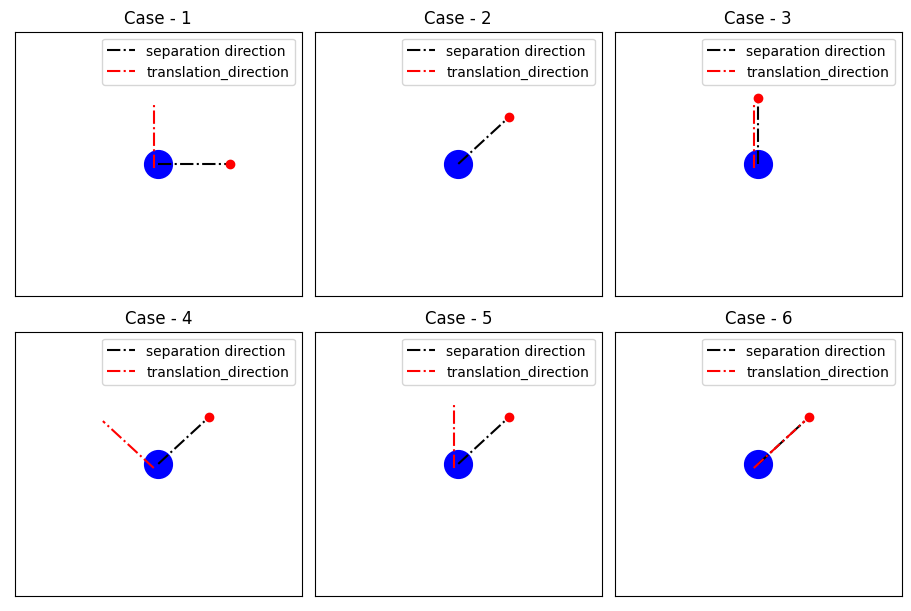

In [13]:
visualize_clocks(settings)

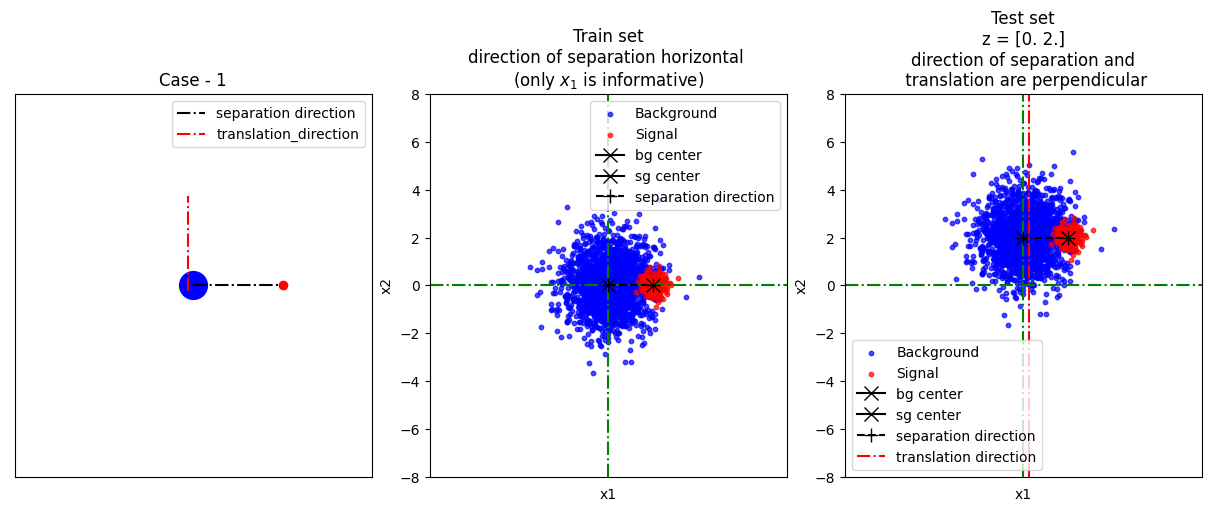

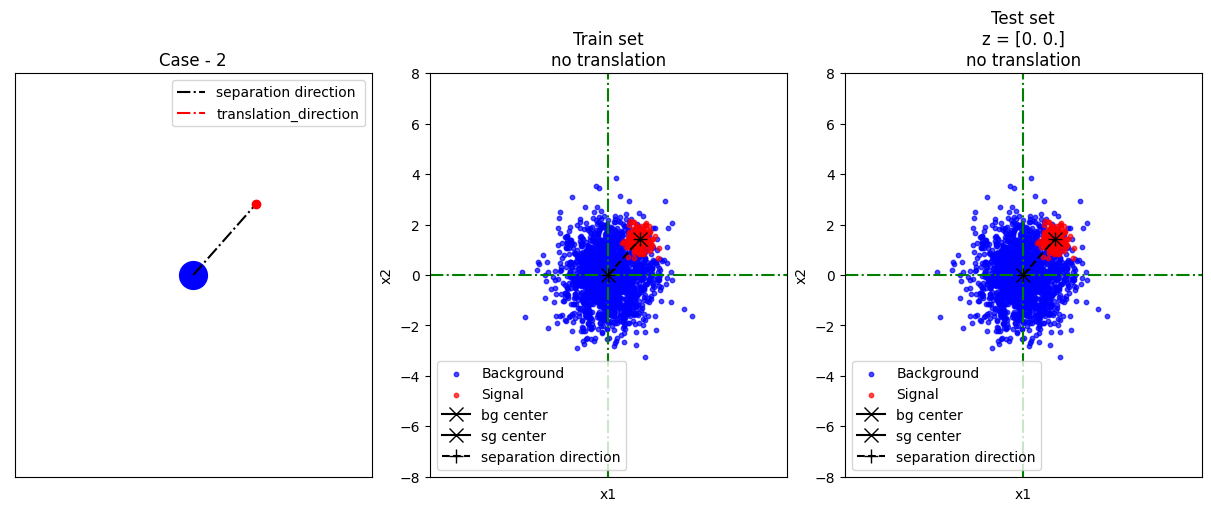

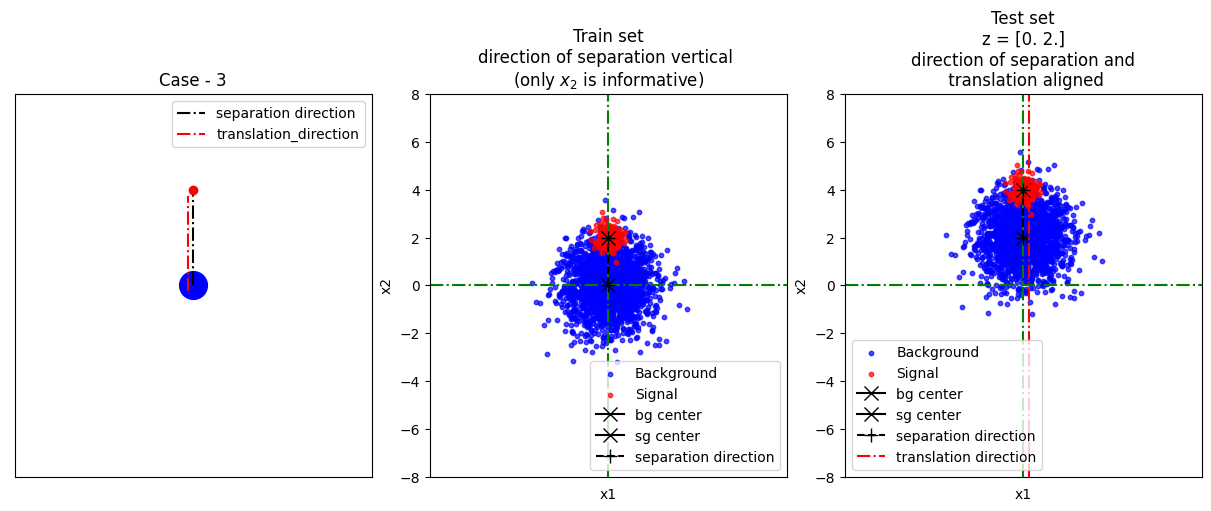

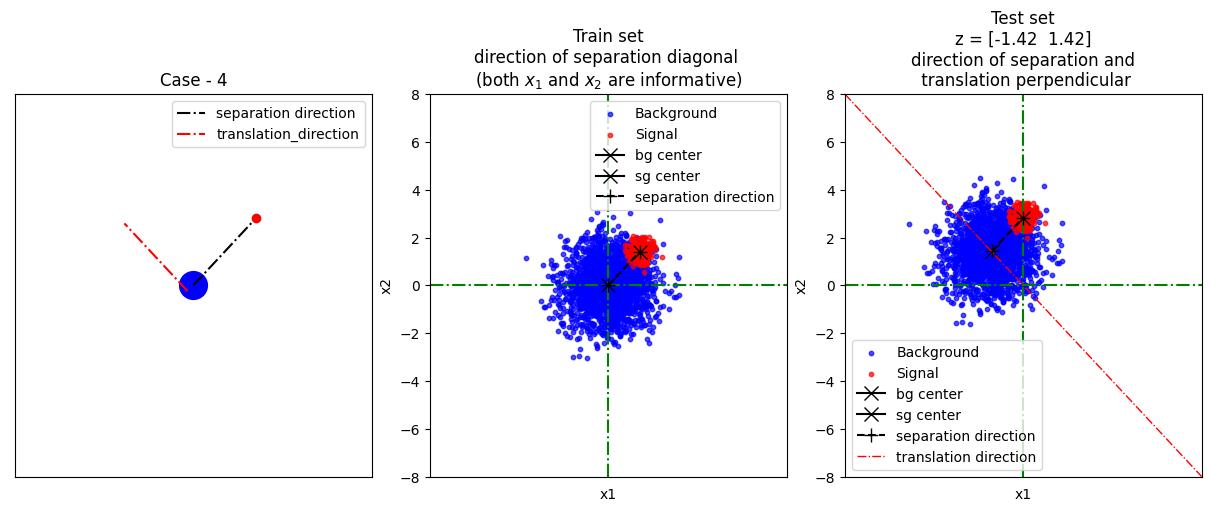

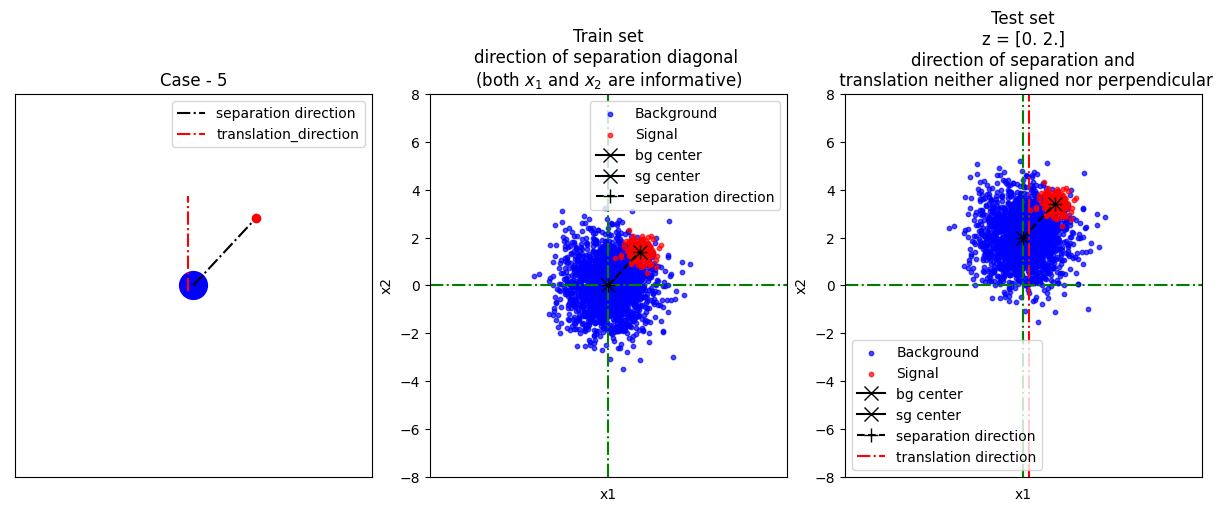

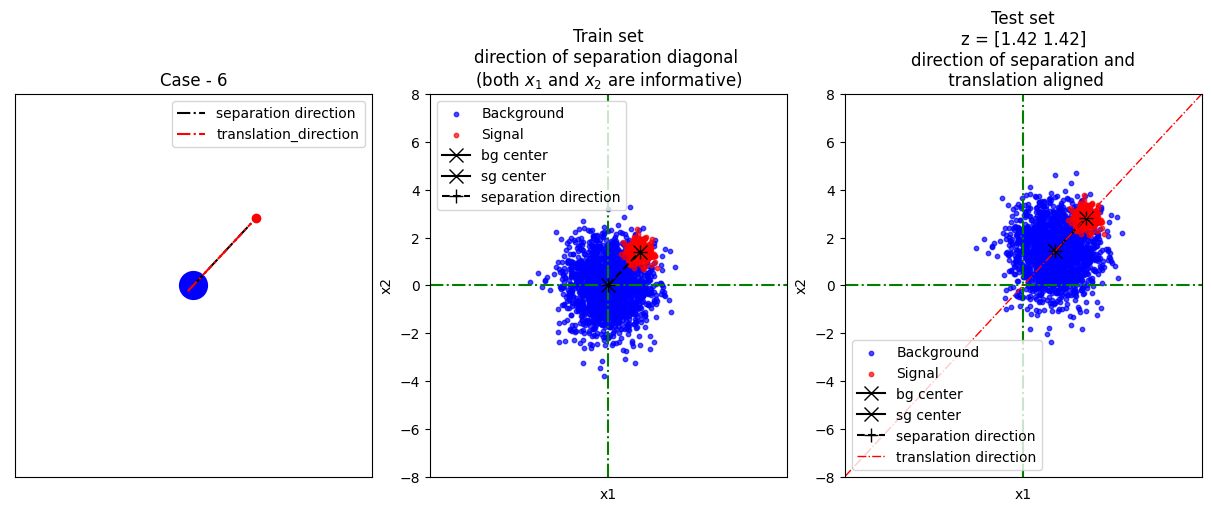

In [14]:
for index, _ in enumerate(train_sets):
    visualize_data(settings[index], train_sets[index], test_sets[index])

***
# 2 - Data Augmentation
***

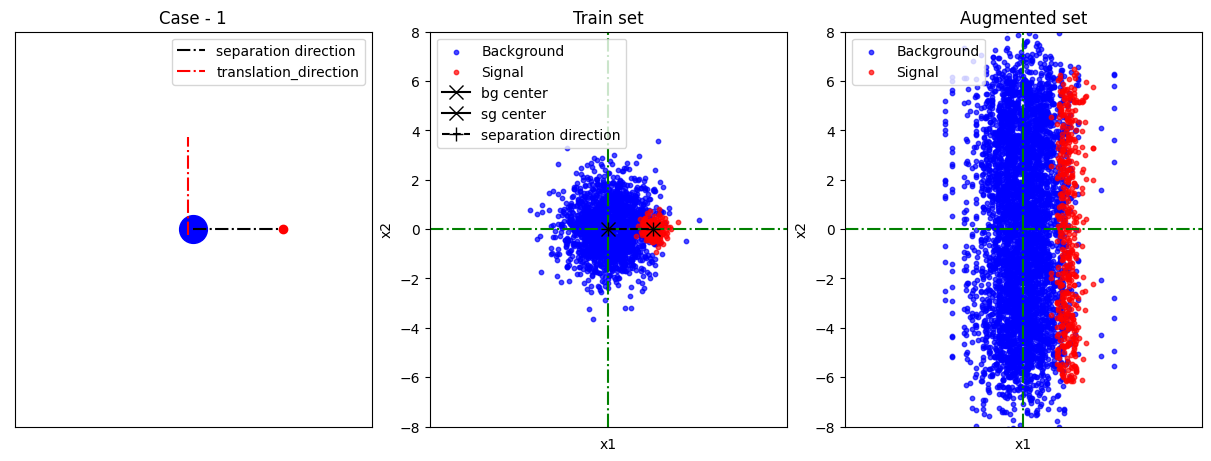

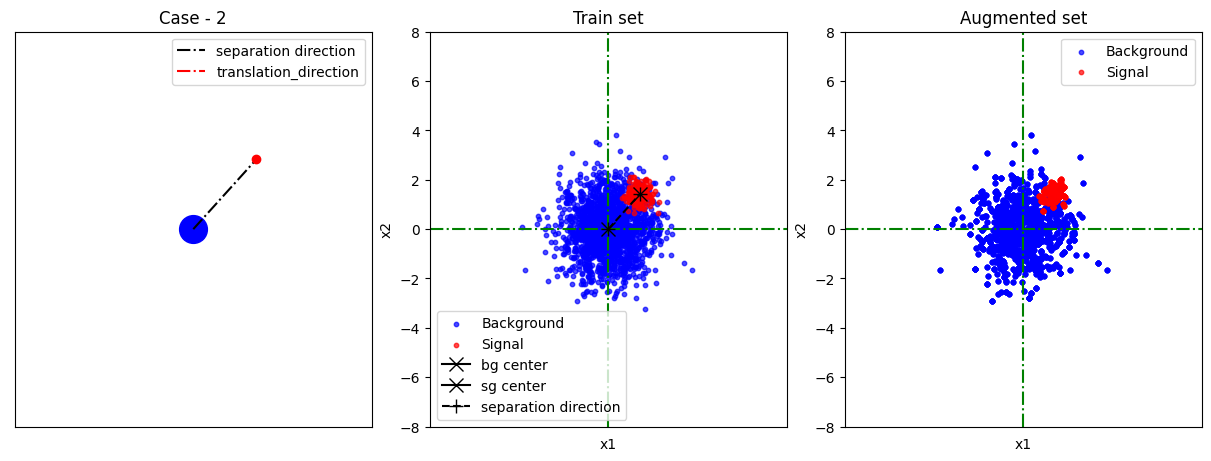

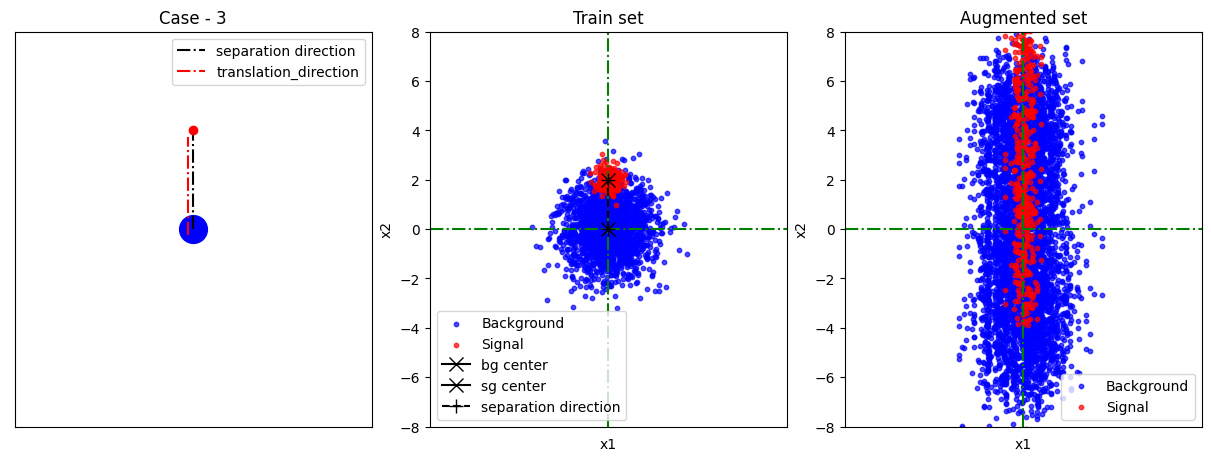

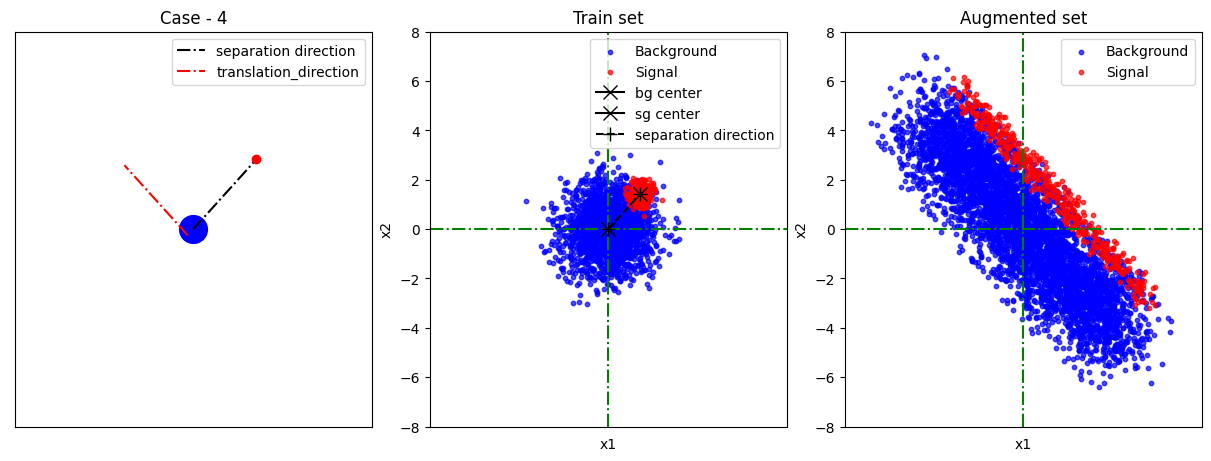

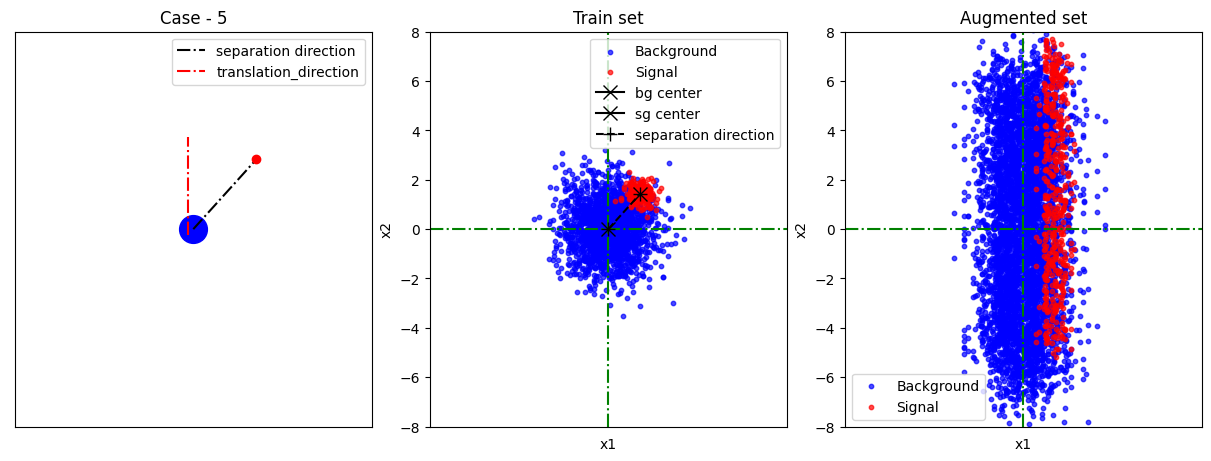

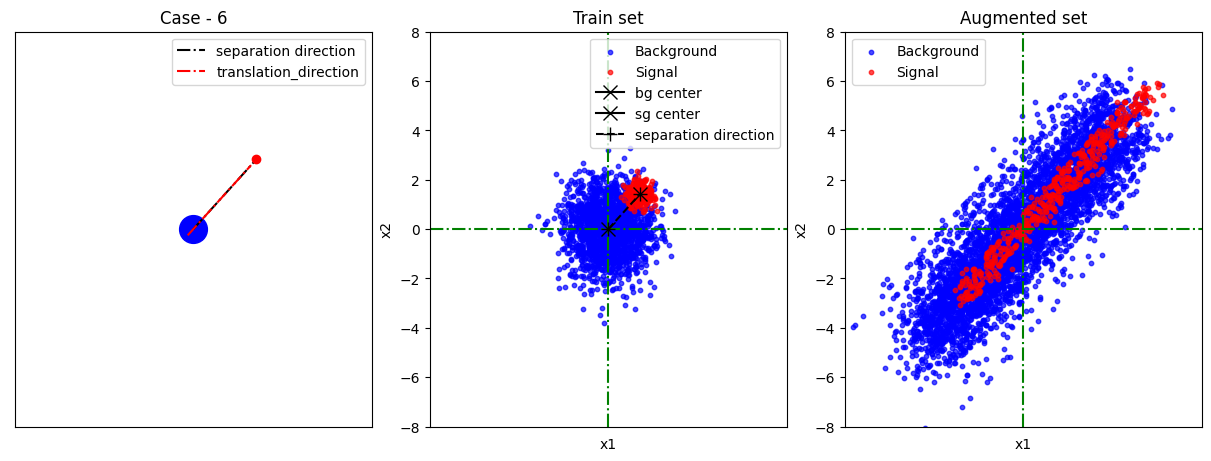

In [15]:
from augment_data import get_augmented_data

augmented_sets = []
for i, _ in enumerate(train_sets):
    augmented_set = get_augmented_data(train_sets[i],  test_sets[i])
    visualize_augmented_data(settings[i], train_sets[i], augmented_set)
    augmented_sets.append(augmented_set)

***
# 3 - Preprocessing
***

In [16]:
train_sets_preprocessed, test_sets_preprocessed = [], []
for train_set, test_set in zip(train_sets, test_sets):
    
    train_mean = np.mean(train_set["data"]).values
    test_mean = np.mean(test_set["data"]).values

    translation = test_mean - train_mean

    train_sets_preprocessed.append({
        "data" : train_set["data"] - translation, 
        "labels" : train_set["labels"] 
    })

    test_sets_preprocessed.append({
        "data" : test_set["data"] - translation, 
        "labels" : test_set["labels"] 
    })


***
# 4 - Baselines
***

In this section, we introduce the following baselines:

1. Constant model
2. NB plain
3. NB preprocessing
4. LDA plain
5. RR plain
6. NB data augmentation
7. LDA data augmentation
8. RR data augmentatio

**Import Model and Scoring function**

In [17]:
from model import Model
from metric import auc_metric, bac_metric

**Model Names and settings**

In [18]:
model_settings = [
    {"display_name" : "constant model", "model_name": "Constant", "preprocessing" : False, "preprocessing_method" : "translation",  "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB plain", "model_name": "NB", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB preprocessing", "model_name": "NB", "preprocessing" : True, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "LDA plain", "model_name": "LDA", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "RR plain", "model_name": "RR", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "SVM plain", "model_name": "SVM", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NN plain", "model_name": "NN", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : False, "data_augmentation_type":"translation"},
    {"display_name" : "NB data augmentation", "model_name": "NB", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "LDA data augmentation", "model_name": "LDA", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "RR data augmentation", "model_name": "RR", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "SVM data augmentation", "model_name": "SVM", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"},
    {"display_name" : "NN data augmentation", "model_name": "NN", "preprocessing" : False, "preprocessing_method" : "translation", "data_augmentation" : True, "data_augmentation_type":"translation"}
]

**Train and Test**  

- Load Data
- Train Model
- Get Predictions
- Get Score
- Get Metric Scores
- Save Predictions
- Save Scores


In [20]:
#---------------------------------
# Load Data
#---------------------------------
# Train set
X_Trains = [train_set["data"] for train_set in train_sets]
Y_Trains = [train_set["labels"] for train_set in train_sets]

# Test set
X_Tests = [test_set["data"] for test_set in test_sets]
Y_Tests = [test_set["labels"] for test_set in test_sets]


print("############################################")
print("### Training Program")
print("############################################")

#---------------------------------
# Loop over model settings
#---------------------------------
results = []
for model_setting in model_settings:

    print("\n--------------------------------------------")
    print("[*] Model : {} --- Preprocessing: {} --- Data Augmentation: {}".format(model_setting["model_name"], model_setting["preprocessing"], model_setting["data_augmentation"]))
    print("--------------------------------------------")
    #---------------------------------
    # Predictions Directory
    #---------------------------------
    # result directory 
    predictions_dir = os.path.join(result_dir, model_setting["model_name"])
    # create result directory if not created
    if not os.path.exists(predictions_dir):
        os.mkdir(predictions_dir) 

    #---------------------------------
    # Loop over datasets
    #---------------------------------
    trained_models = []
    Y_hat_trains, Y_hat_score_trains = [], []
    Y_hat_tests, Y_hat_score_tests = [], []
    auc_trains, auc_tests, bac_trains, bac_tests = [],[],[],[]
    for index, _ in enumerate(X_Trains):

        print("\n\tDataset : {}".format(index+1))
        print("\t----------------")

    
        # model_name 
        trained_model_name = model_dir + model_setting["model_name"]

        #---------------------------------
        # Load Model
        #---------------------------------
        print("\t[*] Loading Model")
        model = Model(
            model_setting["model_name"],
            X_Trains[index],
            Y_Trains[index],
            X_Tests[index],
            model_setting["preprocessing"],
            model_setting["preprocessing_method"],
            model_setting["data_augmentation"],
            model_setting["data_augmentation_type"]
        )
        # Load Trained Model 
        # model = model.load(trained_model_name) 

        #---------------------------------
        # Train Model
        #---------------------------------
        # Train model if not trained
        print("\t[*] Training Model")
        if not(model.is_trained):
            model.fit() 

        #---------------------------------
        # Get Predictions
        #---------------------------------
        print("\t[*] Get Predictions")
        Y_hat_trains.append(model.predict(X_Trains[index]))
        Y_hat_tests.append(model.predict())
            
        #---------------------------------
        # Get Scores/Proba
        #---------------------------------
        print("\t[*] Get Scores")
        Y_hat_score_trains.append(model.decision_function(X_Trains[index]))
        Y_hat_score_tests.append(model.decision_function())

        trained_models.append(model)

        #---------------------------------
        # Get Metric Scores
        #---------------------------------
        print("\t[*] Computing Scores using AUC and BAC")
        auc_trains.append(round(auc_metric(Y_Trains[index], Y_hat_score_trains[-1]), 2))
        auc_tests.append(round(auc_metric(Y_Tests[index], Y_hat_score_tests[-1]), 2))
        # bac_trains.append(round(bac_metric(Y_Trains[index], Y_hat_trains[-1]), 2))
        # bac_tests.append(round(bac_metric(Y_Tests[index], Y_hat_tests[-1]), 2))


        #---------------------------------
        # Save Predictions
        #---------------------------------
        print("\t[*] Saving Predictions and Scores")
        # prediction file name
        prediction_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".predictions")
        prediction_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".predictions")

        # score file name
        score_name_train = os.path.join(predictions_dir, "train_"+ str(index+1) + ".scores")
        score_name_test = os.path.join(predictions_dir, "test_"+ str(index+1) + ".scores")
        
        # save prediction
        write(prediction_name_train, Y_hat_score_trains[-1])
        write(prediction_name_test, Y_hat_score_tests[-1])

        # save score
        write(score_name_train, Y_hat_score_trains[-1])
        write(score_name_test, Y_hat_score_tests[-1])
    


    train_auc_err = round(np.std(auc_trains)/np.sqrt(len(auc_trains)), 2)
    test_auc_err = round(np.std(auc_tests)/np.sqrt(len(auc_tests)), 2)
    train_bac_err = round(np.std(bac_trains)/np.sqrt(len(bac_trains)), 2)
    test_bac_err = round(np.std(bac_tests)/np.sqrt(len(bac_tests)), 2)
    train_auc_mean = round(np.mean(auc_trains), 2)
    test_auc_mean = round(np.mean(auc_tests), 2)
    train_bac_mean = round(np.mean(bac_trains), 2)
    test_bac_mean = round(np.mean(bac_tests), 2)

    results.append({
        "trained_models" : trained_models,
        "Y_hat_trains" : Y_hat_trains,
        "Y_hat_tests" : Y_hat_tests,
        "Y_hat_score_trains" : Y_hat_score_trains,
        "Y_hat_score_tests" : Y_hat_score_tests,
        "auc_trains" : auc_trains,
        "auc_tests" : auc_tests,
        "bac_trains" : bac_trains,
        "bac_tests" : bac_tests,
        "train_auc_err" : train_auc_err,
        "test_auc_err" : test_auc_err,
        "train_bac_err" : train_bac_err,
        "test_bac_err" : test_bac_err,
        "train_auc_mean" : train_auc_mean,
        "test_auc_mean" : test_auc_mean,
        "train_bac_mean" : train_bac_mean,
        "test_bac_mean" : test_bac_mean

    })

############################################
### Training Program
############################################

--------------------------------------------
[*] Model : Constant --- Preprocessing: False --- Data Augmentation: False
--------------------------------------------

	Dataset : 1
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 2
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 3
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions and Scores

	Dataset : 4
	----------------
	[*] Loading Model
	[*] Training Model
	[*] Get Predictions
	[*] Get Scores
	[*] Computing Scores using AUC and BAC
	[*] Saving Predictions an

ValueError: Input contains NaN.

### **Optimal Bayesian Classifier**

In [ ]:
from obc import get_OBC_predictions_score

obc_predictions, obc_scores = get_OBC_predictions_score(settings[1], X_Tests[1])

obc_auc = round(auc_metric(Y_Trains[1], obc_scores), 2)
obc_bac = round(bac_metric(Y_Tests[1], obc_predictions), 2)

***
# 5 - Decision Boundaries
***

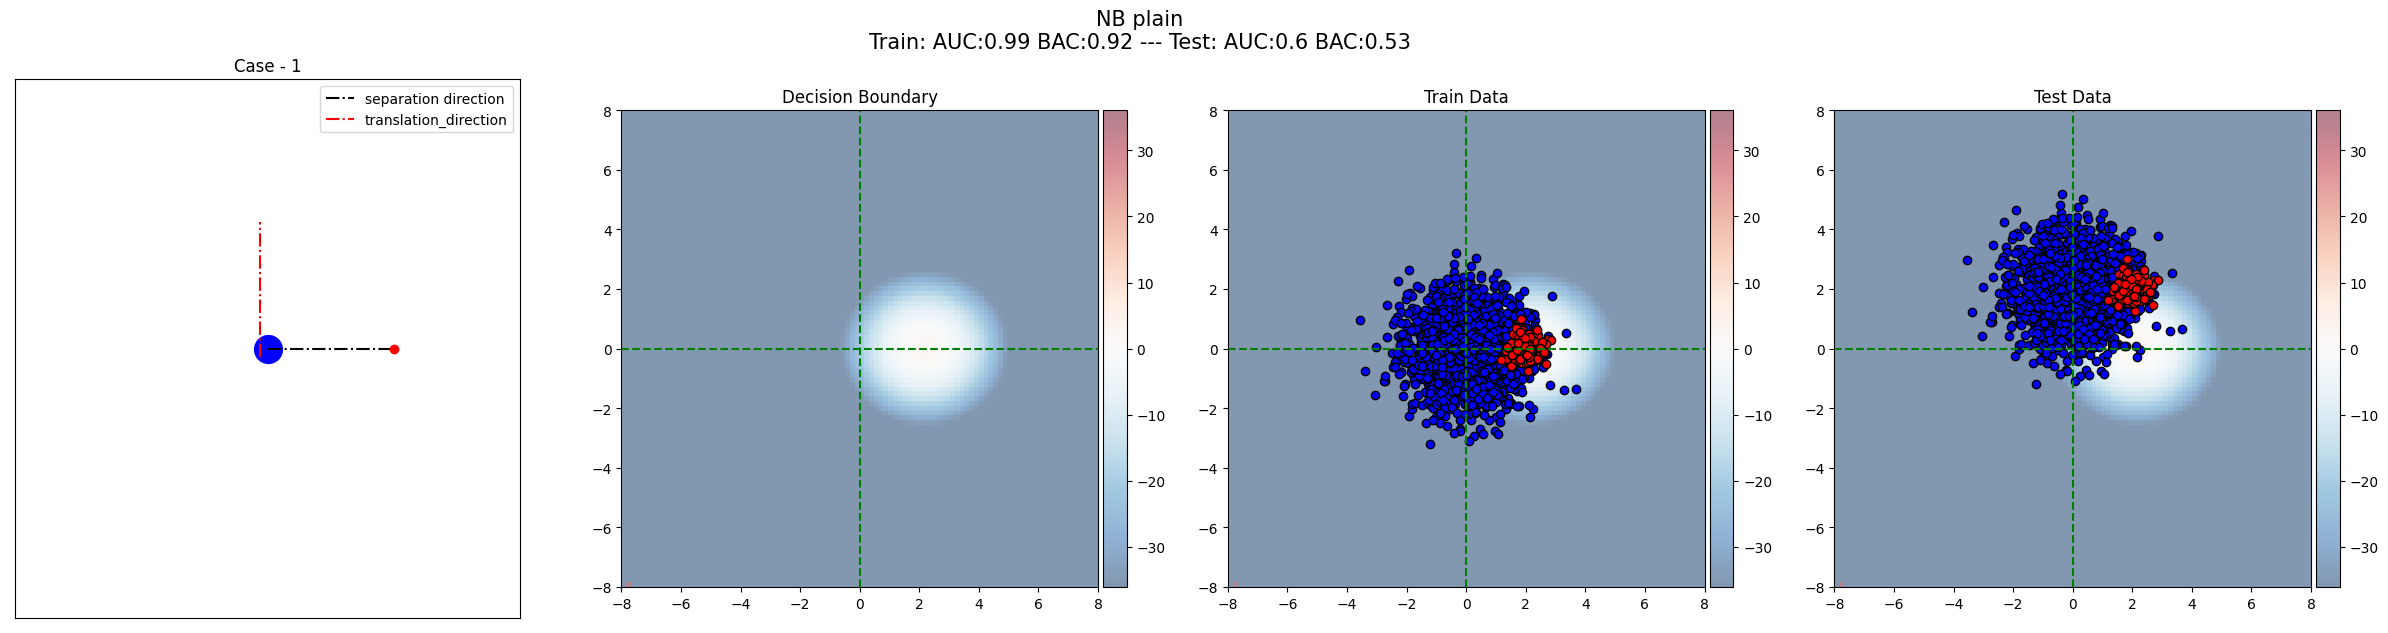

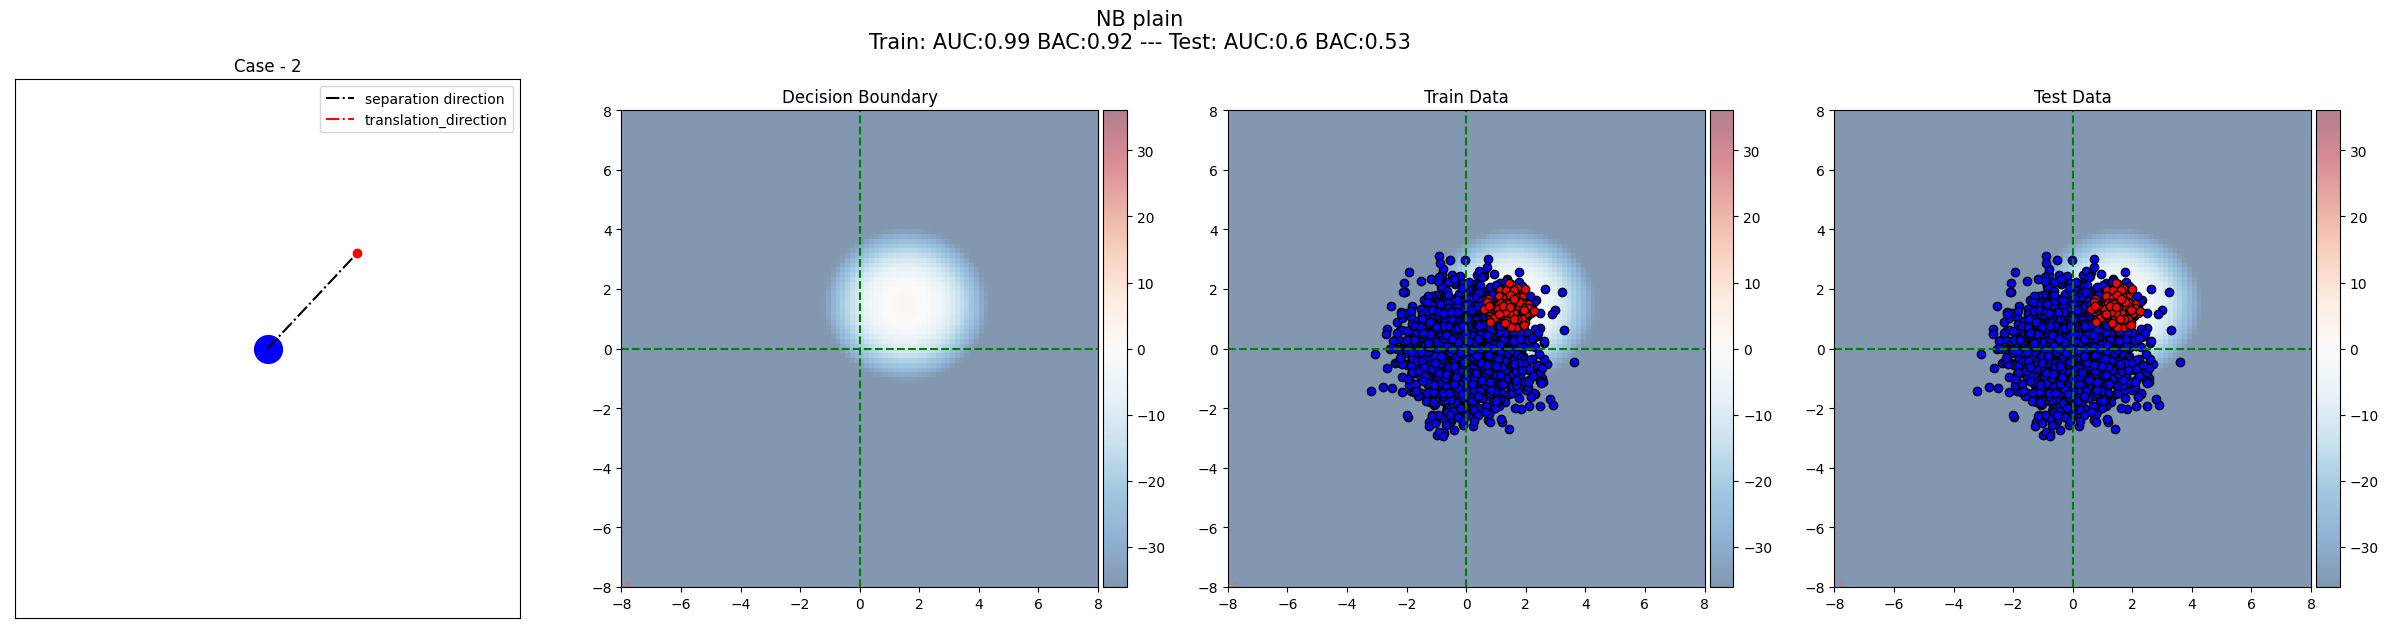

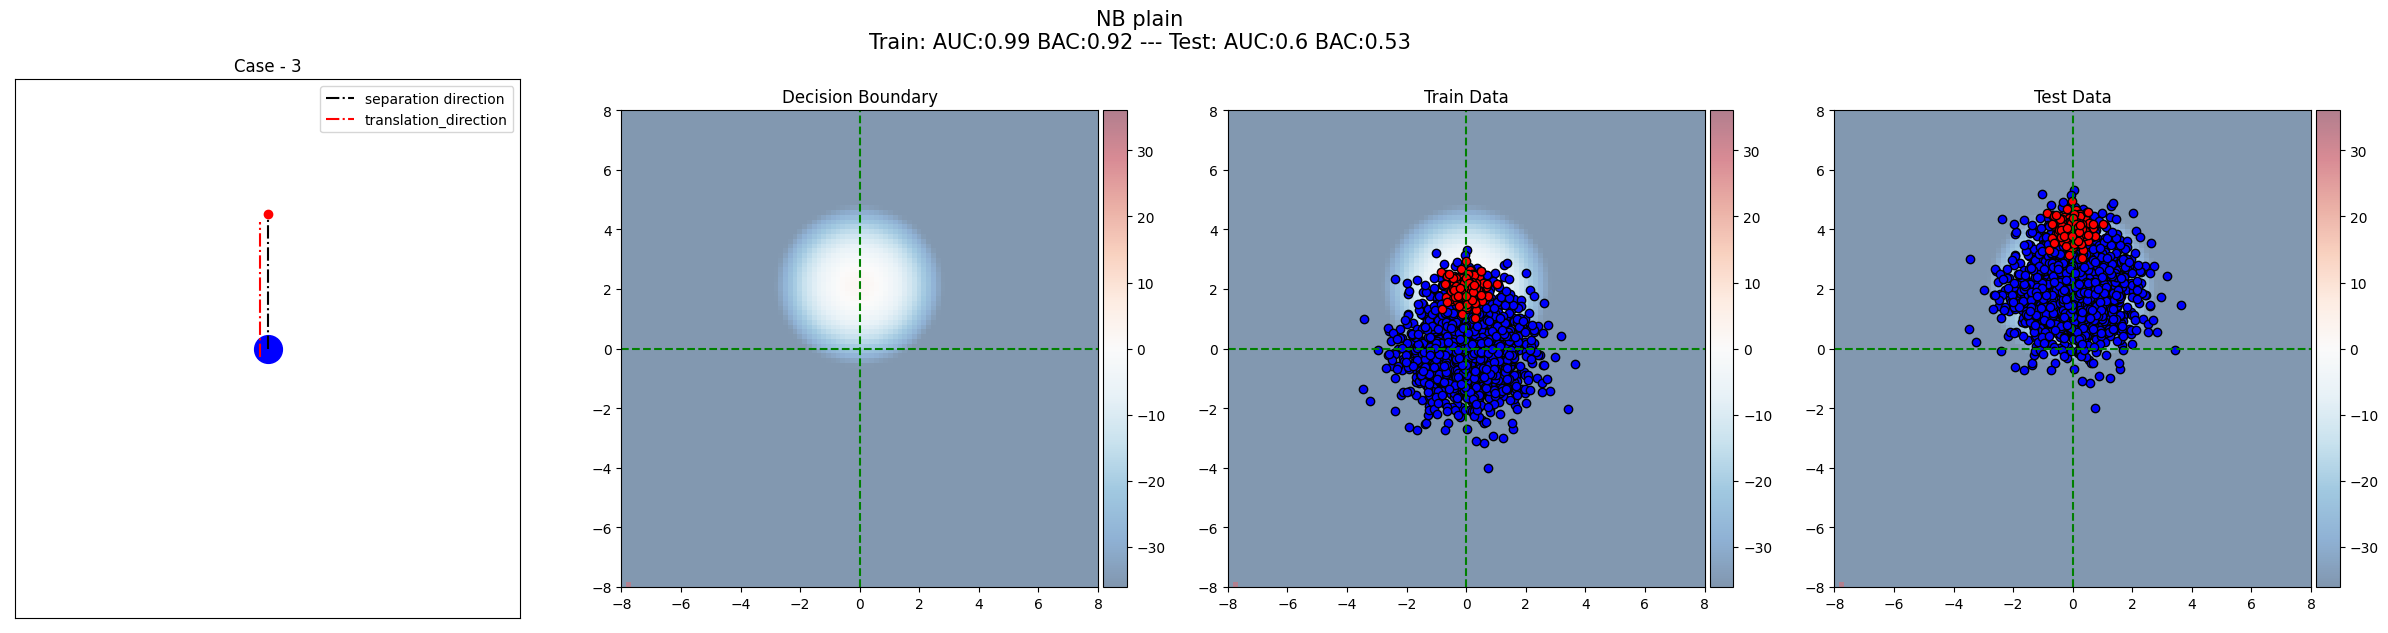

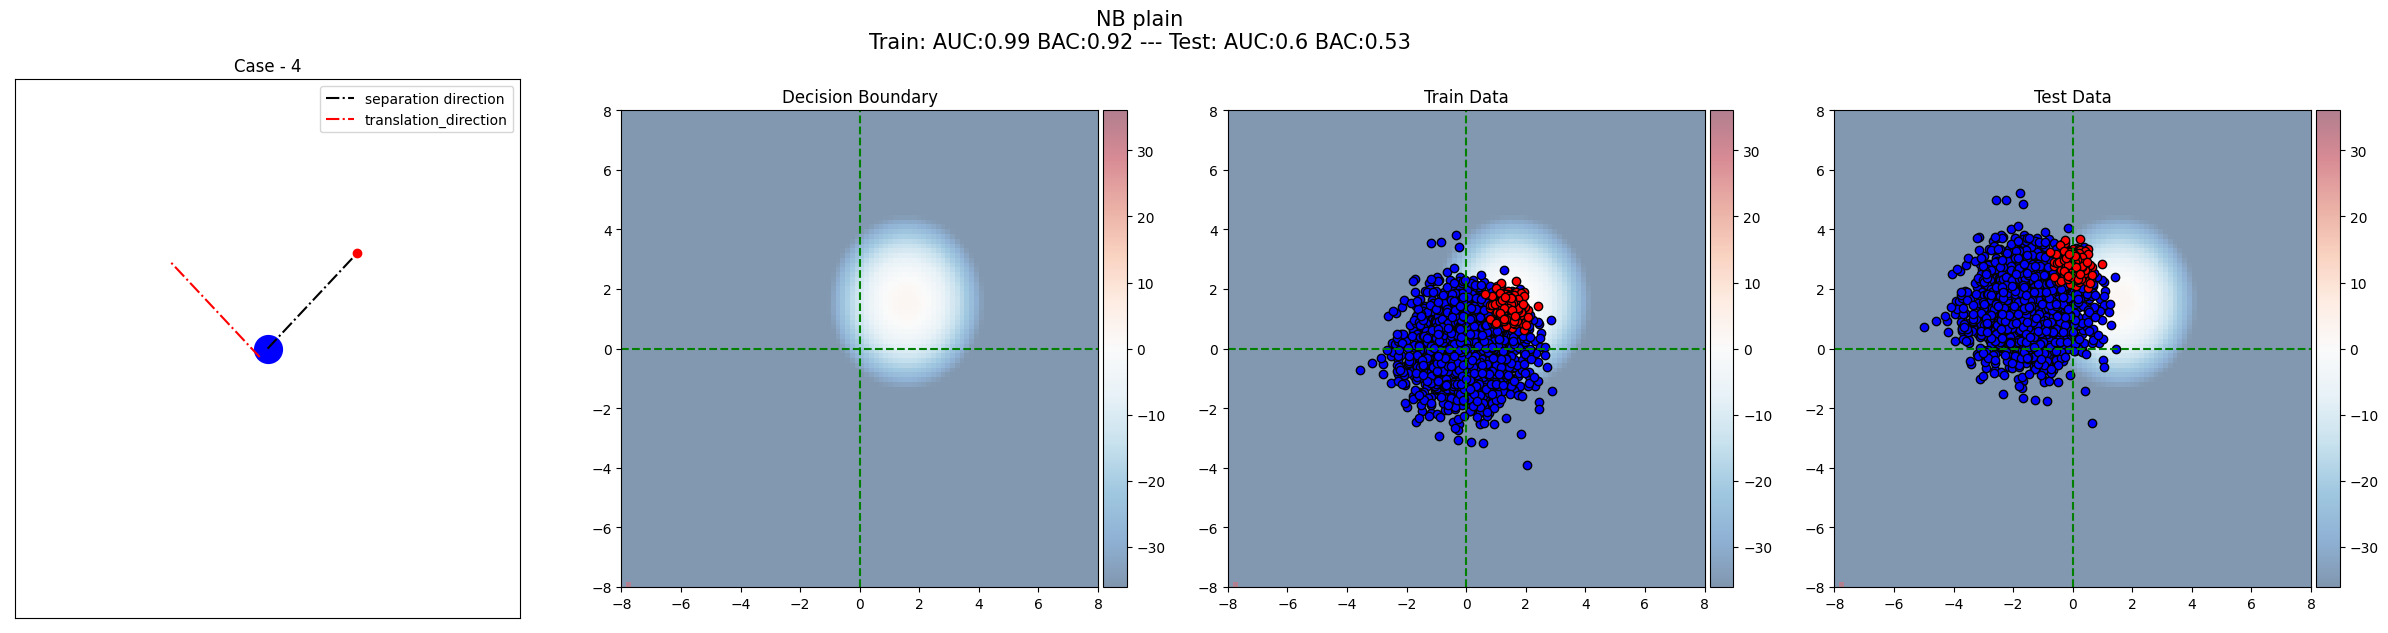

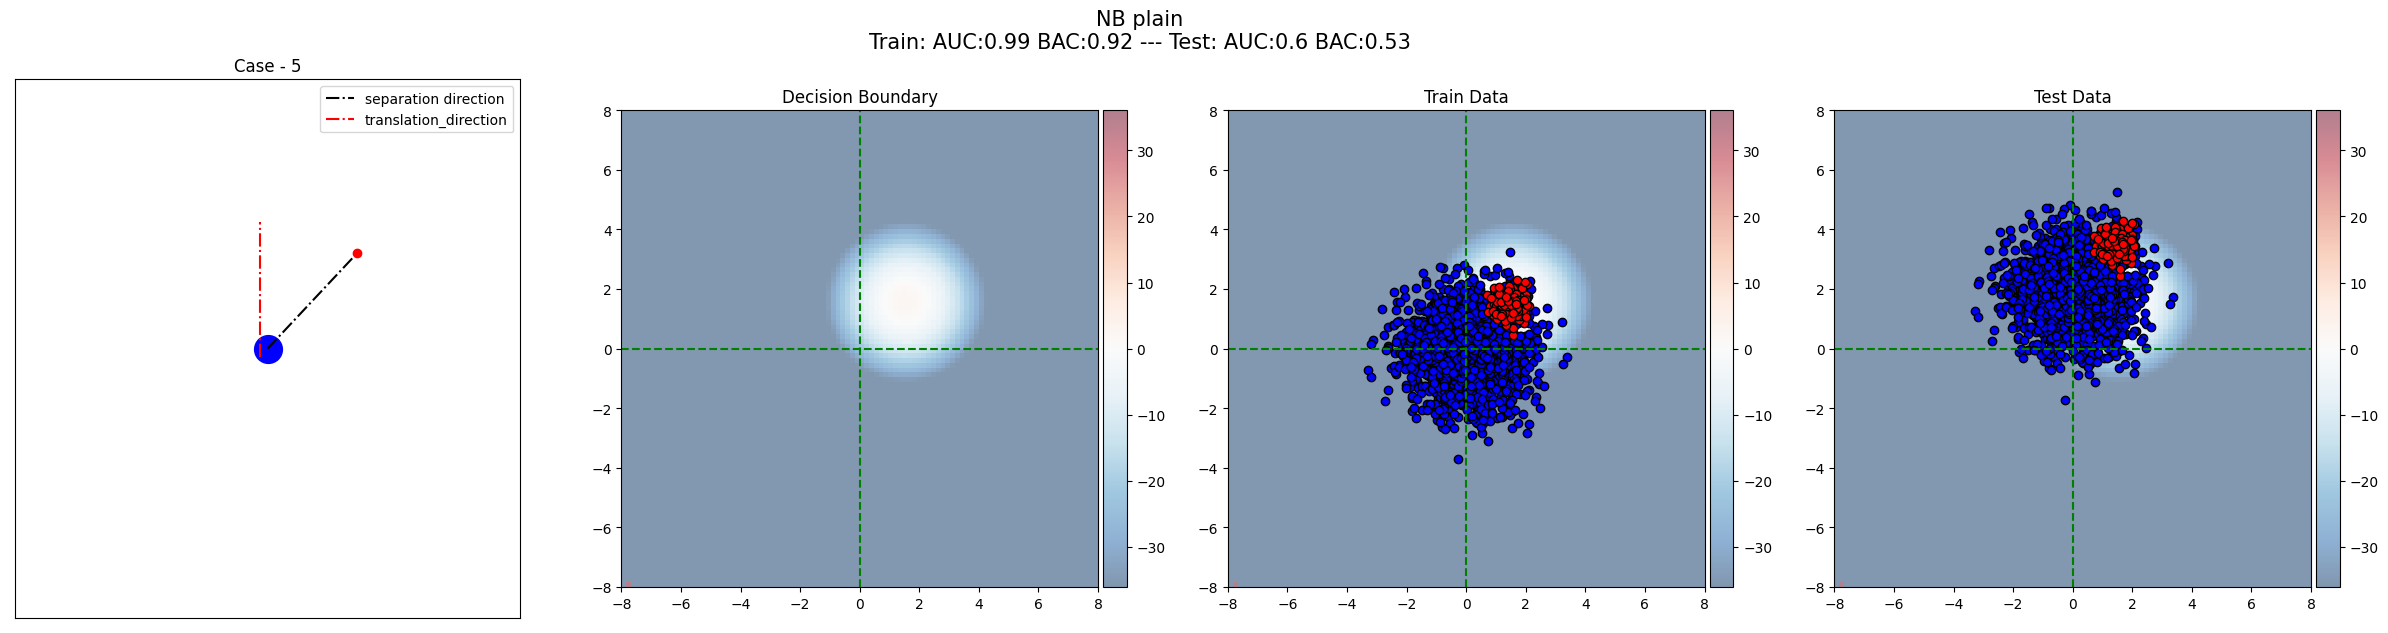

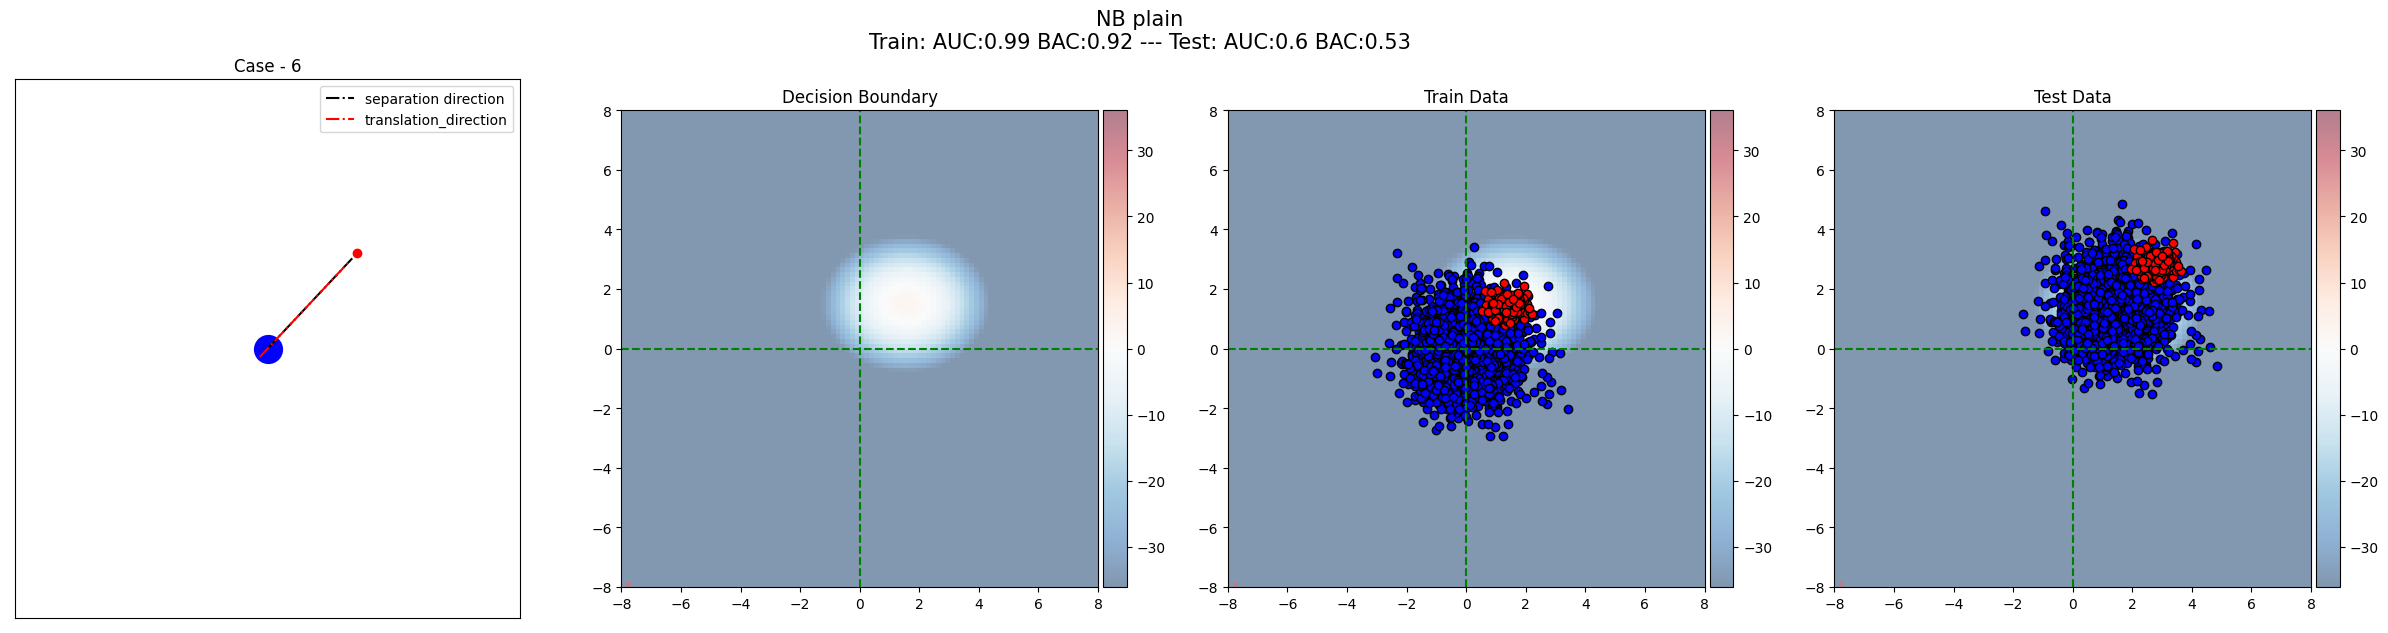

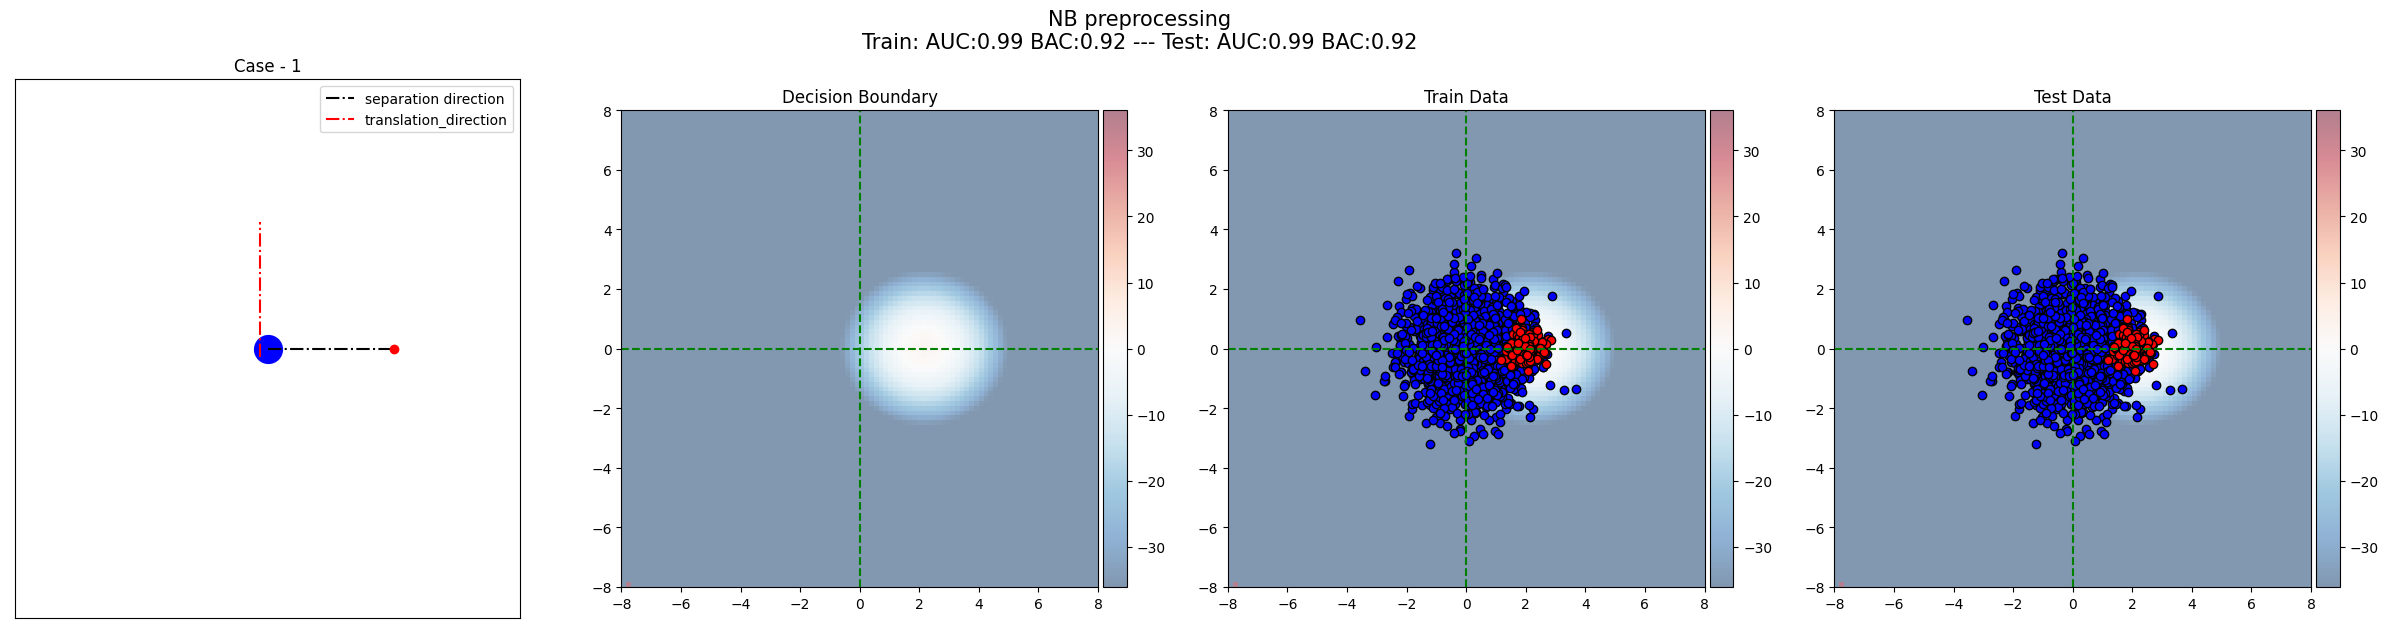

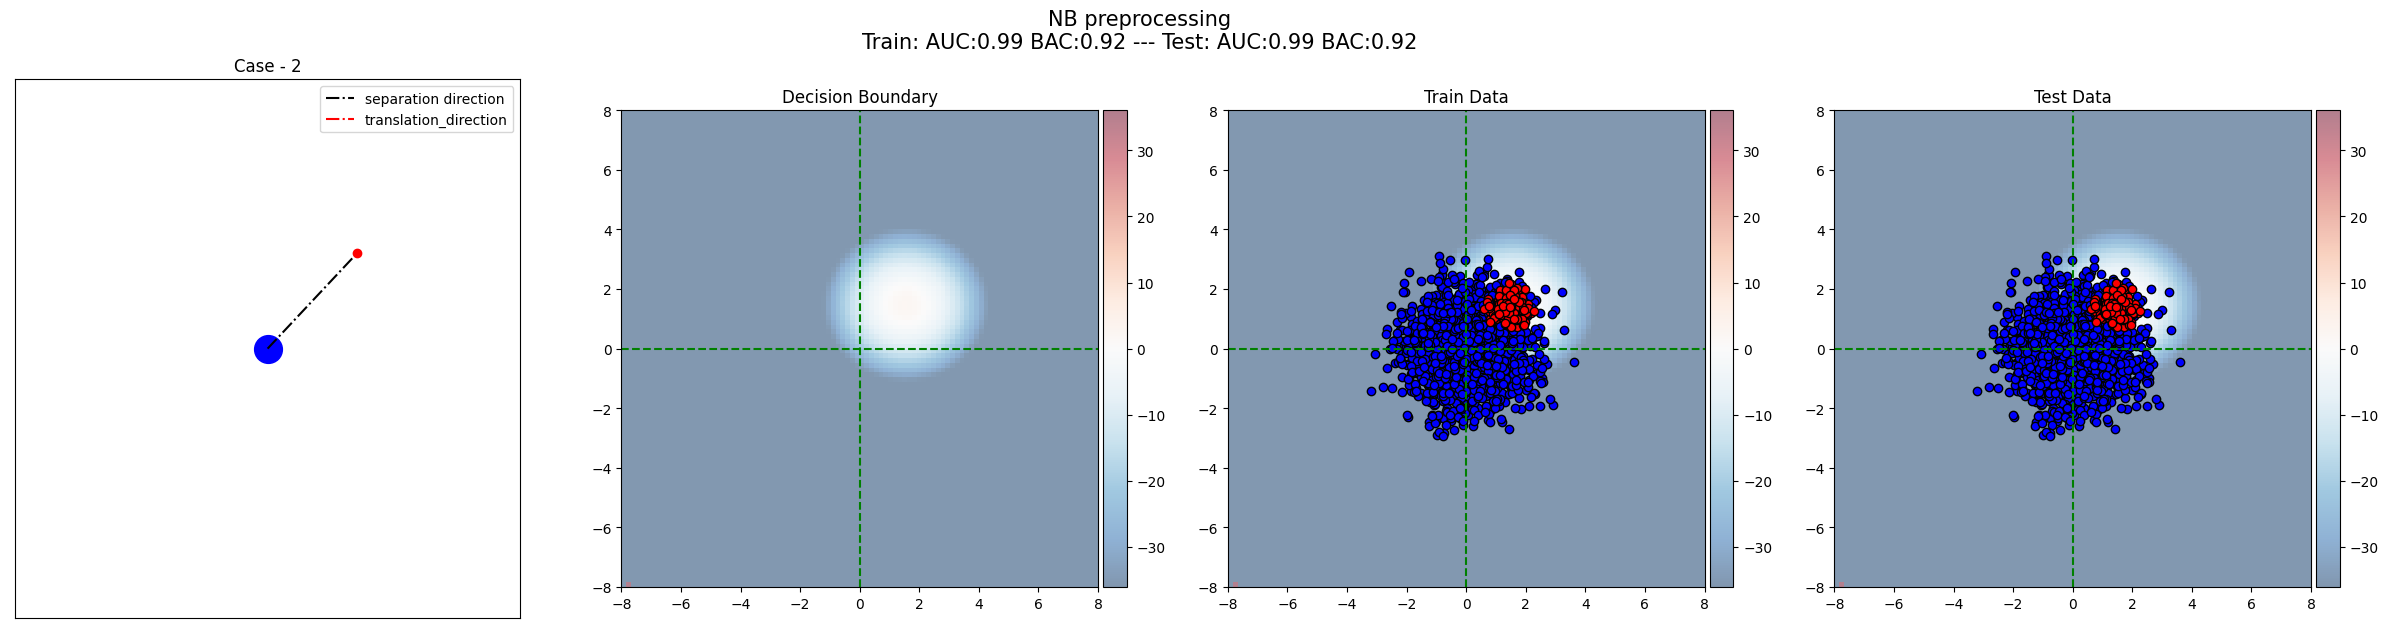

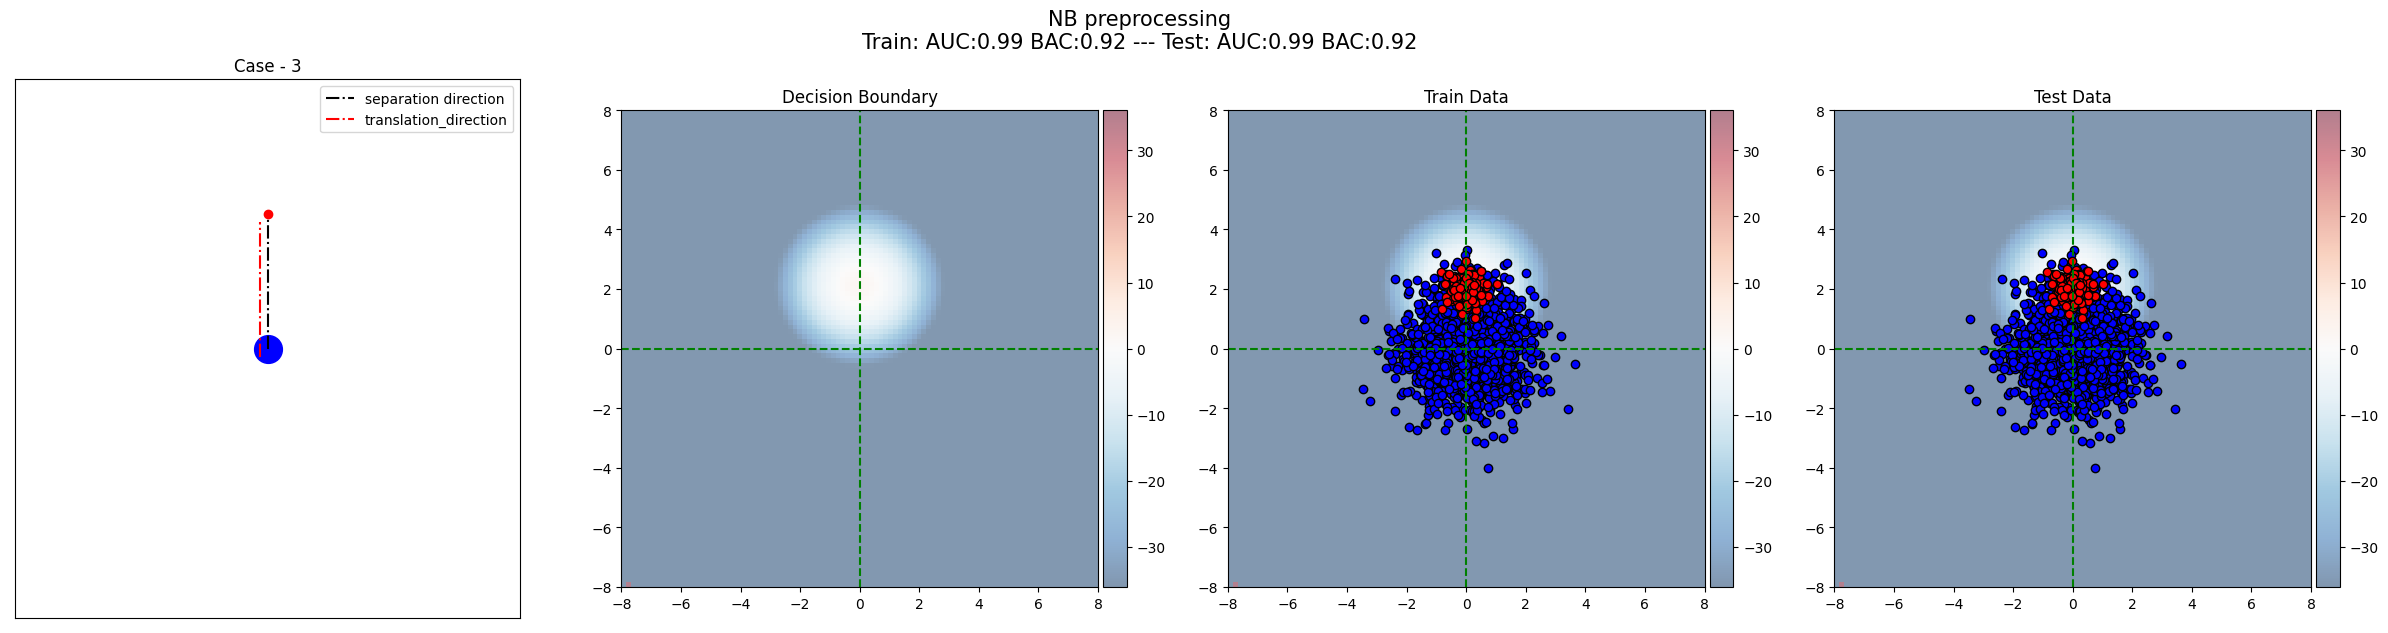

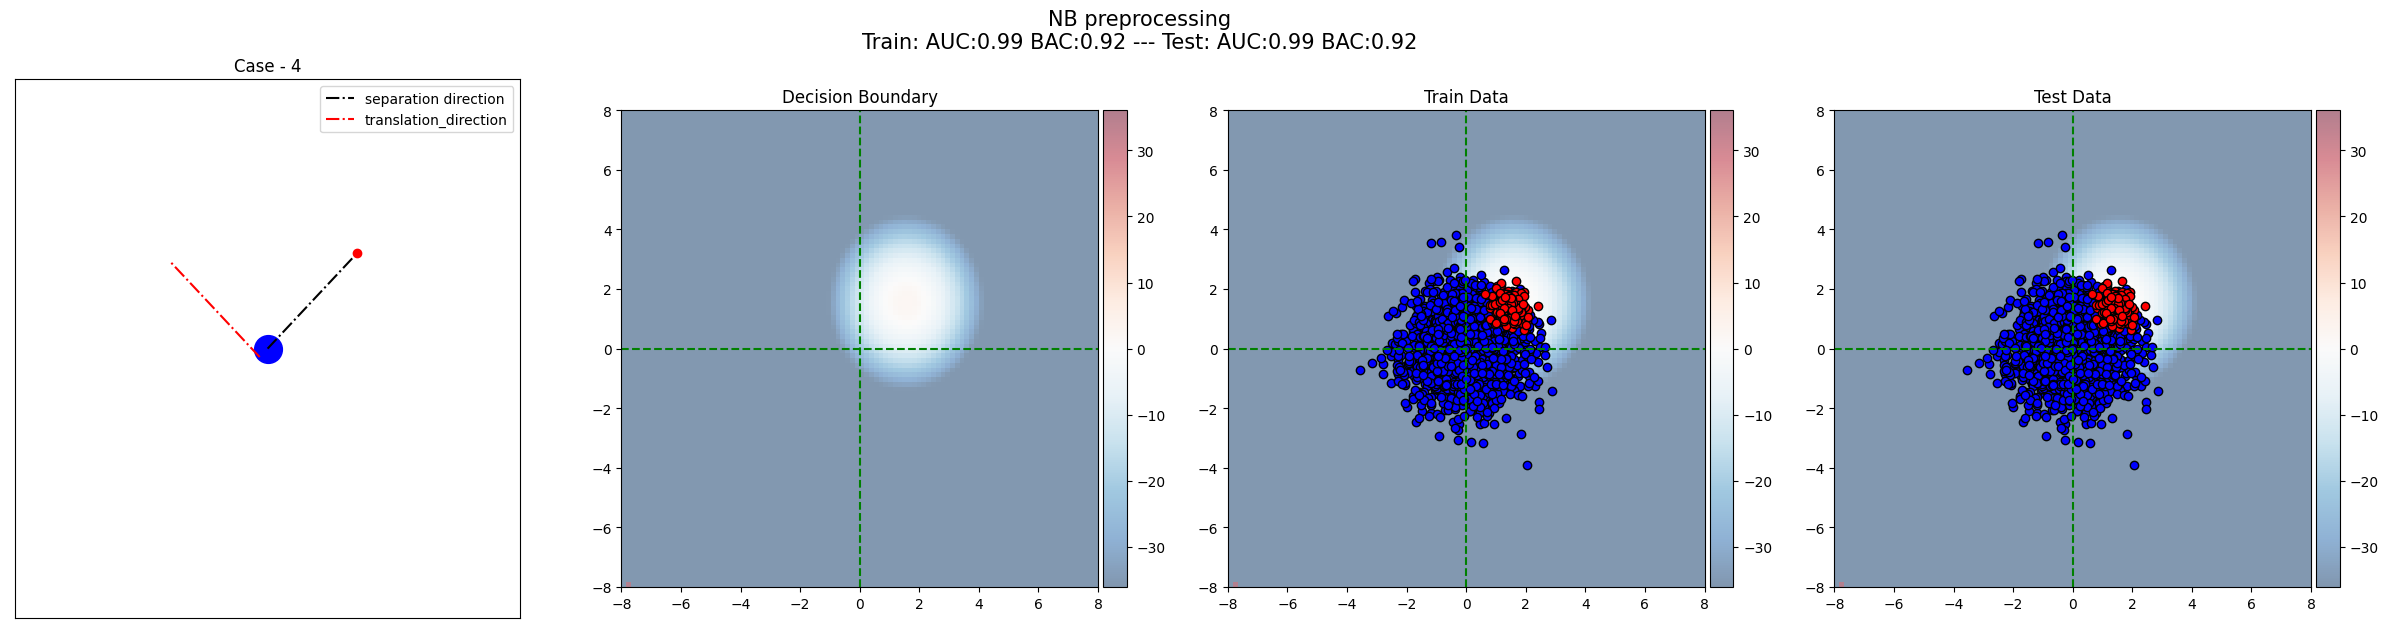

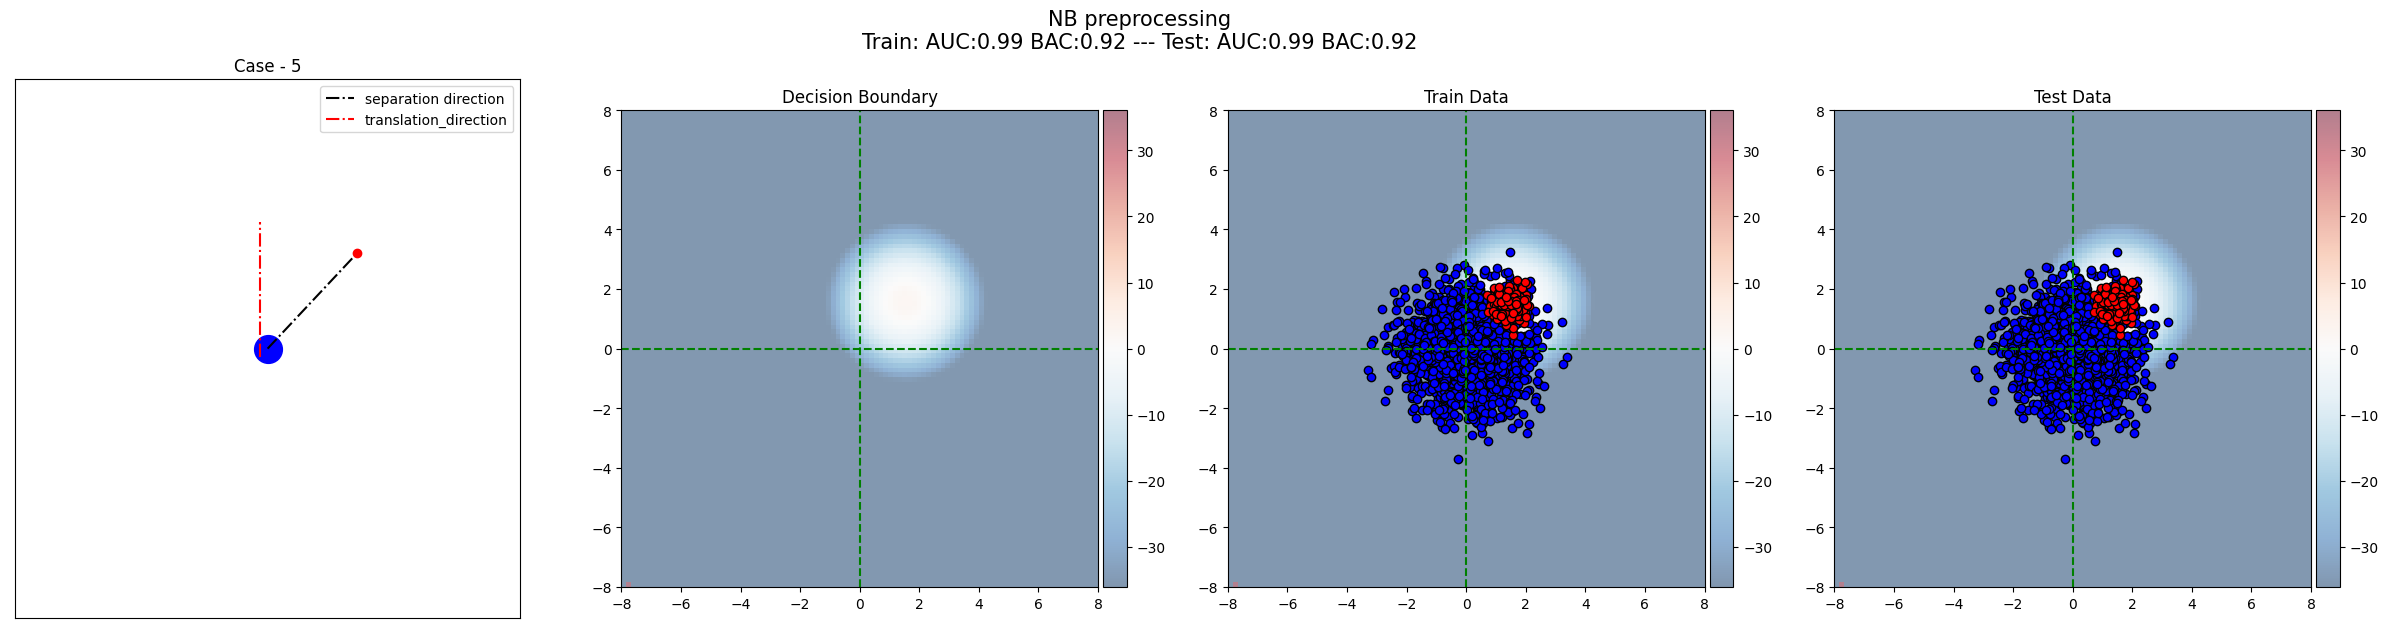

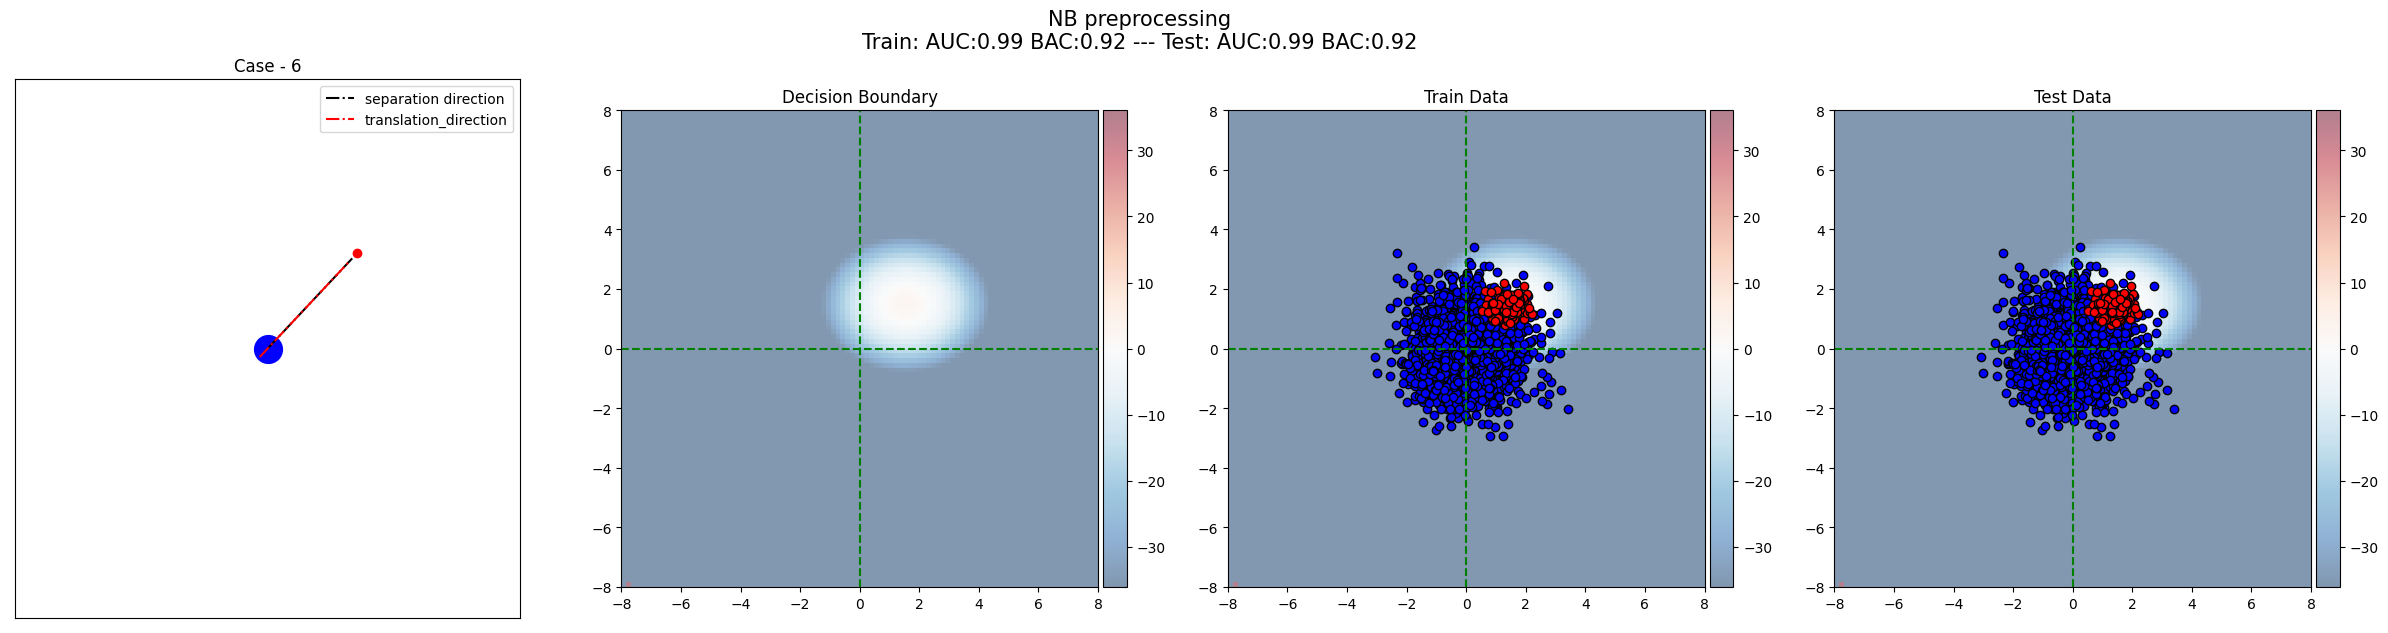

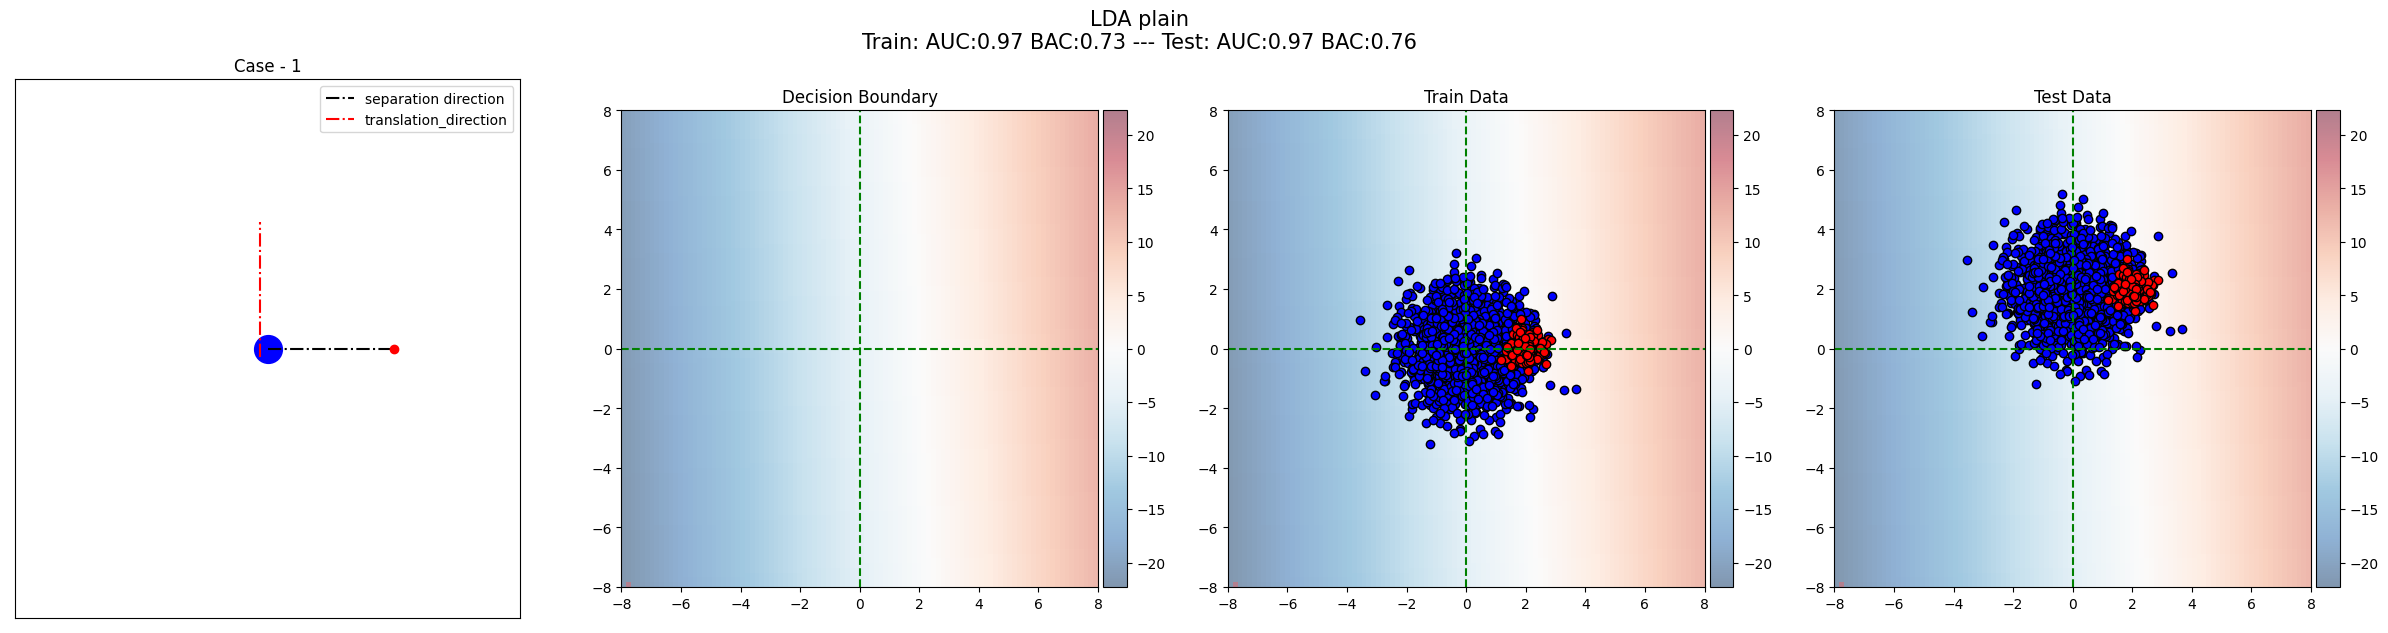

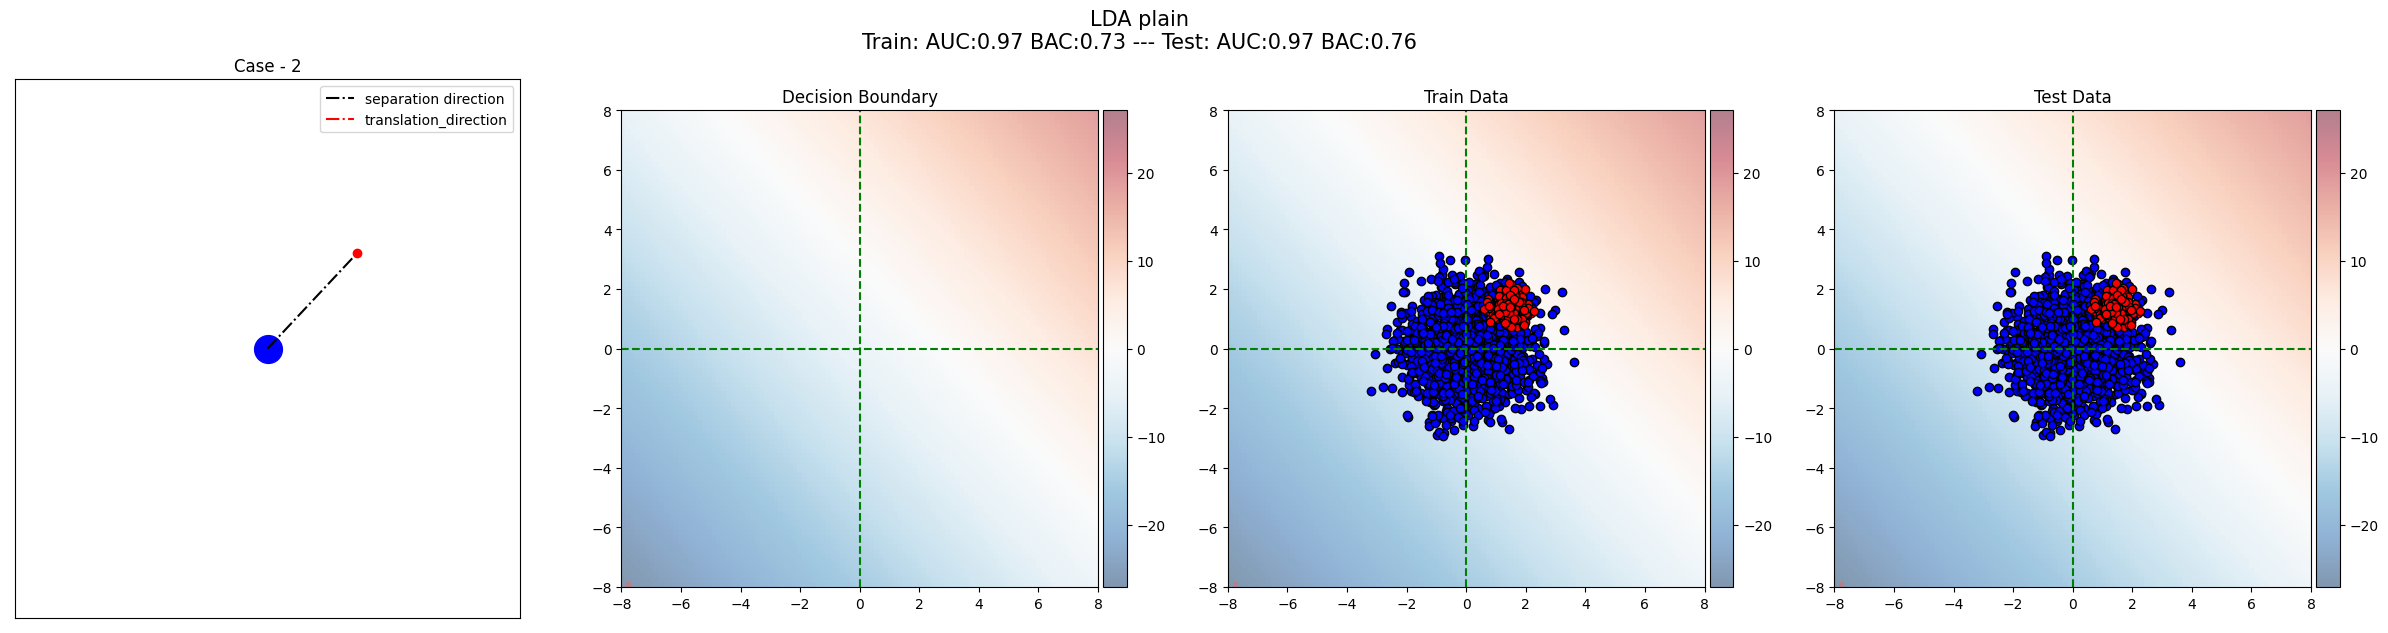

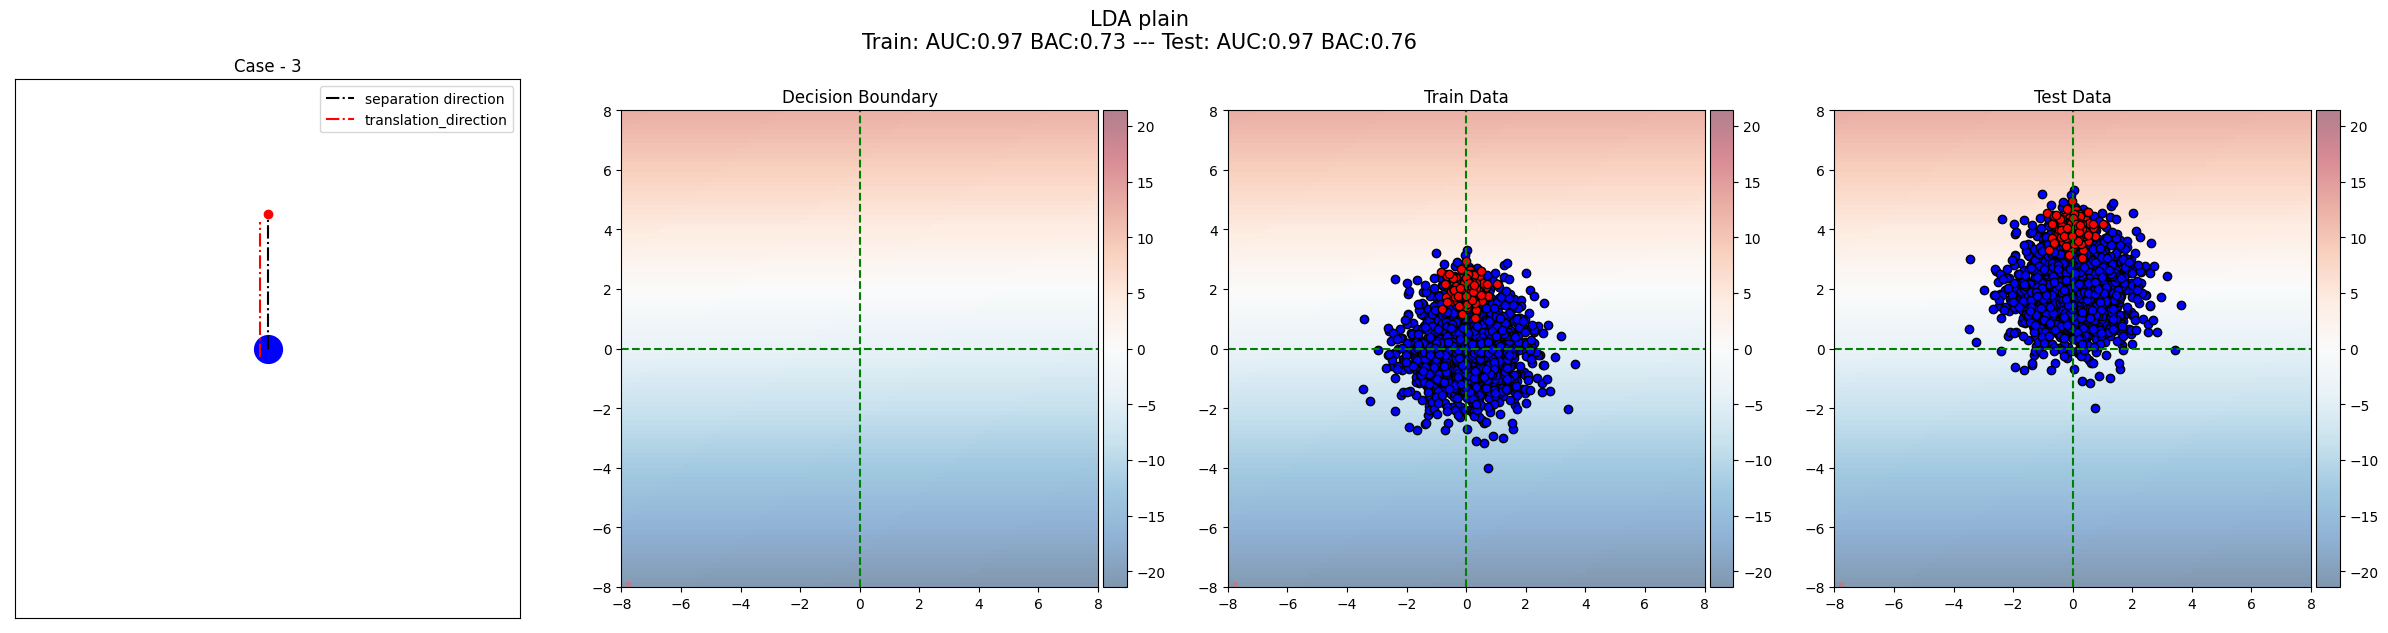

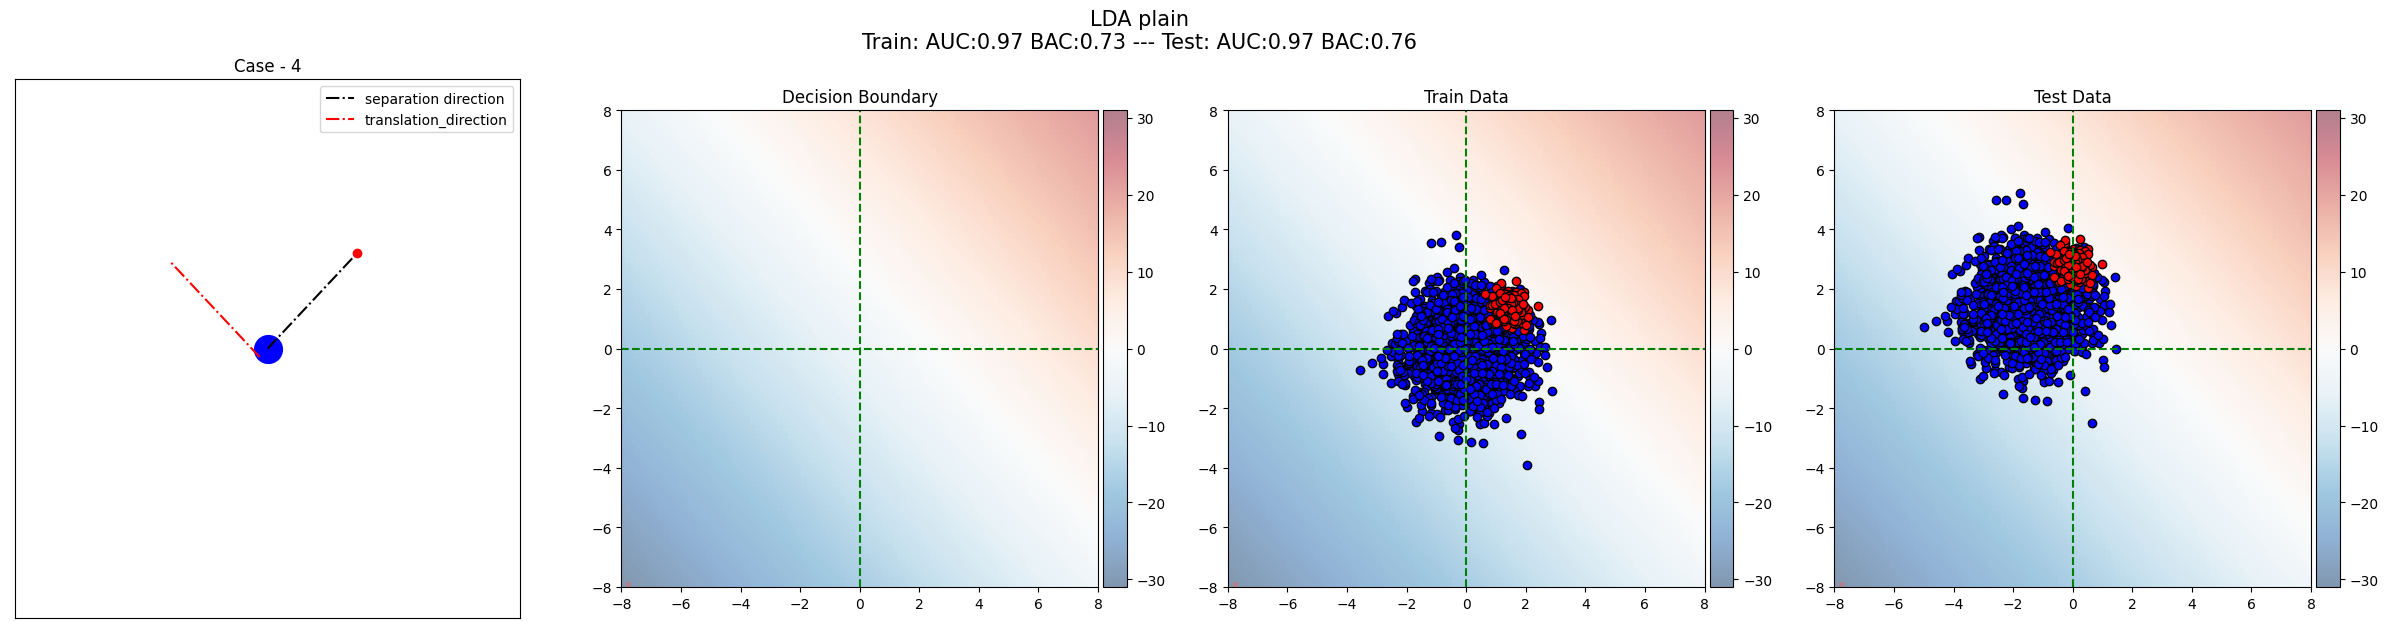

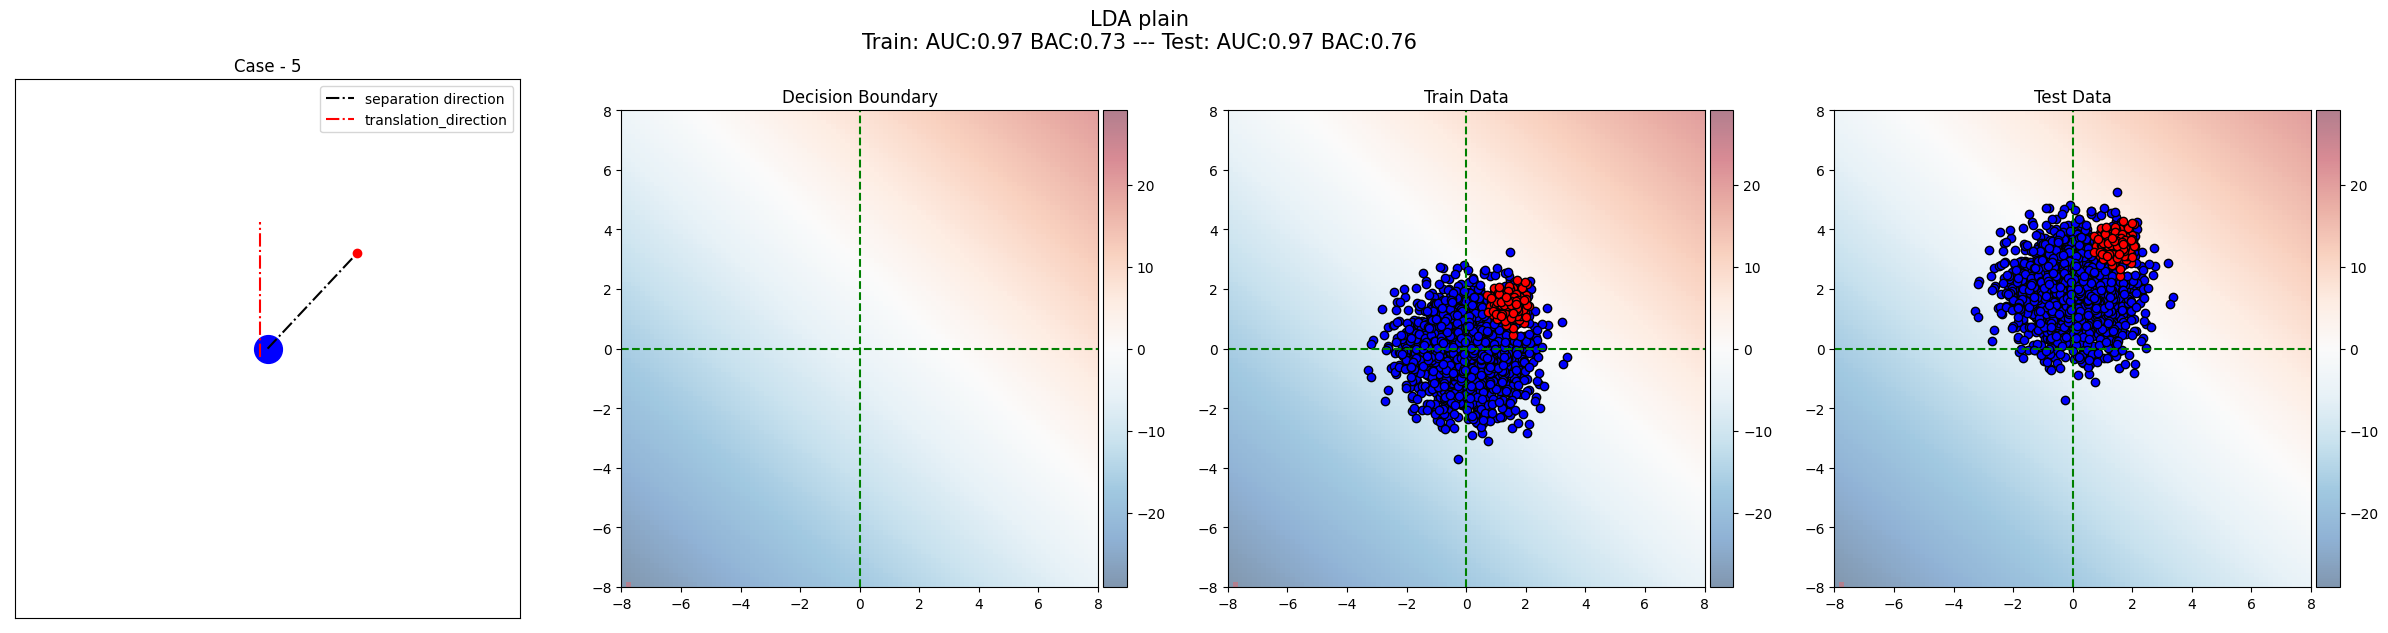

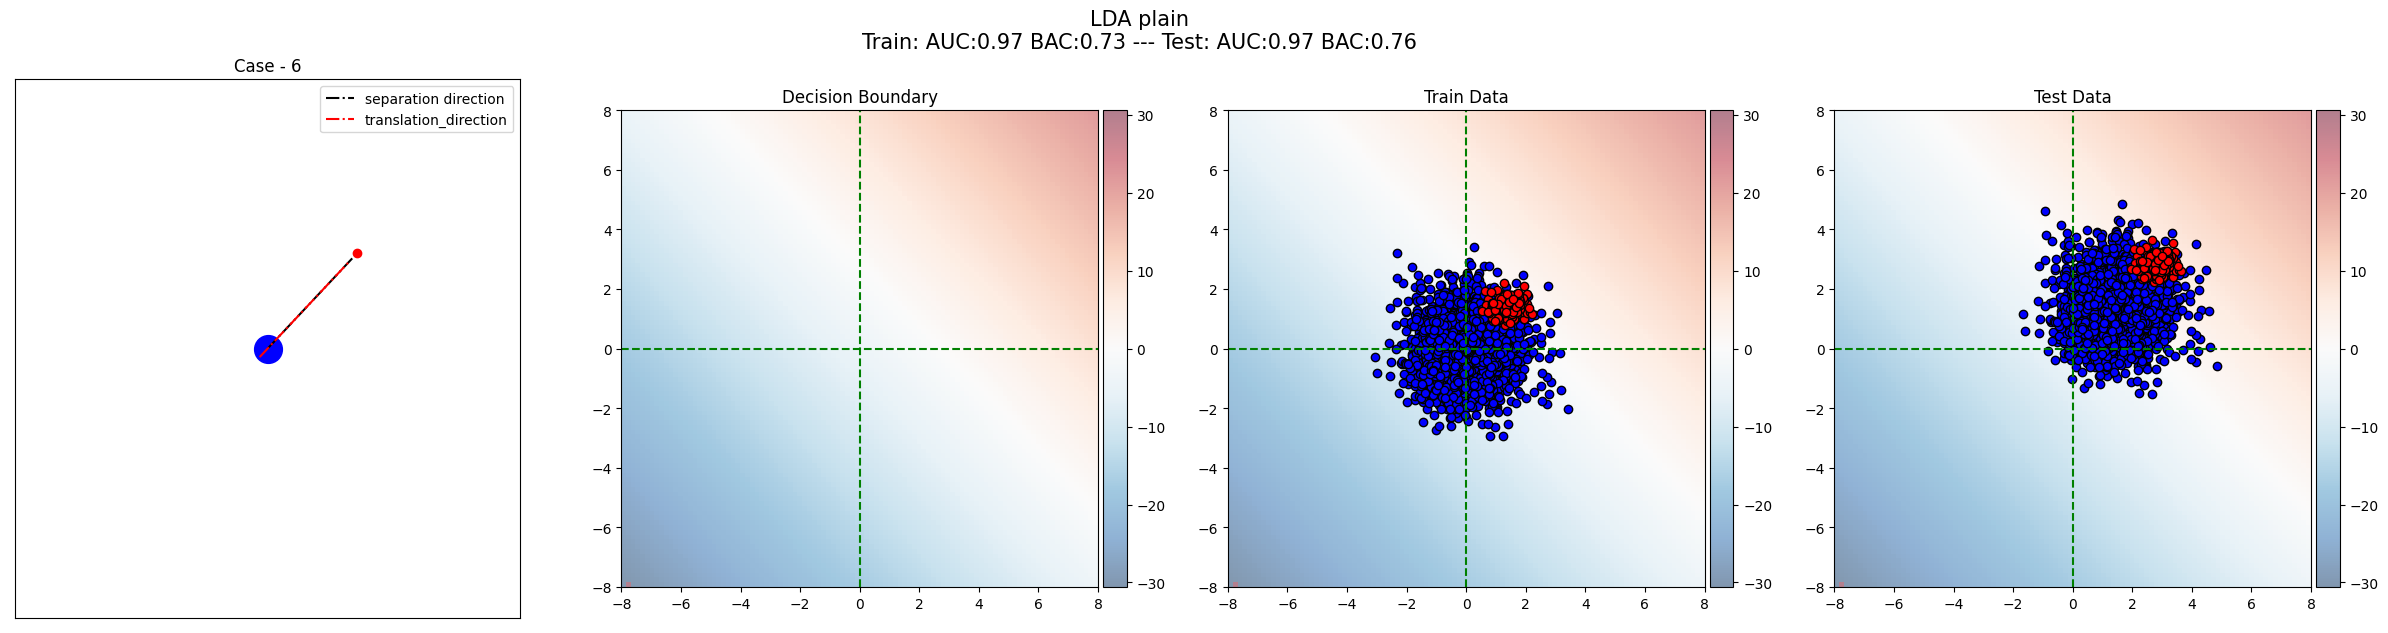

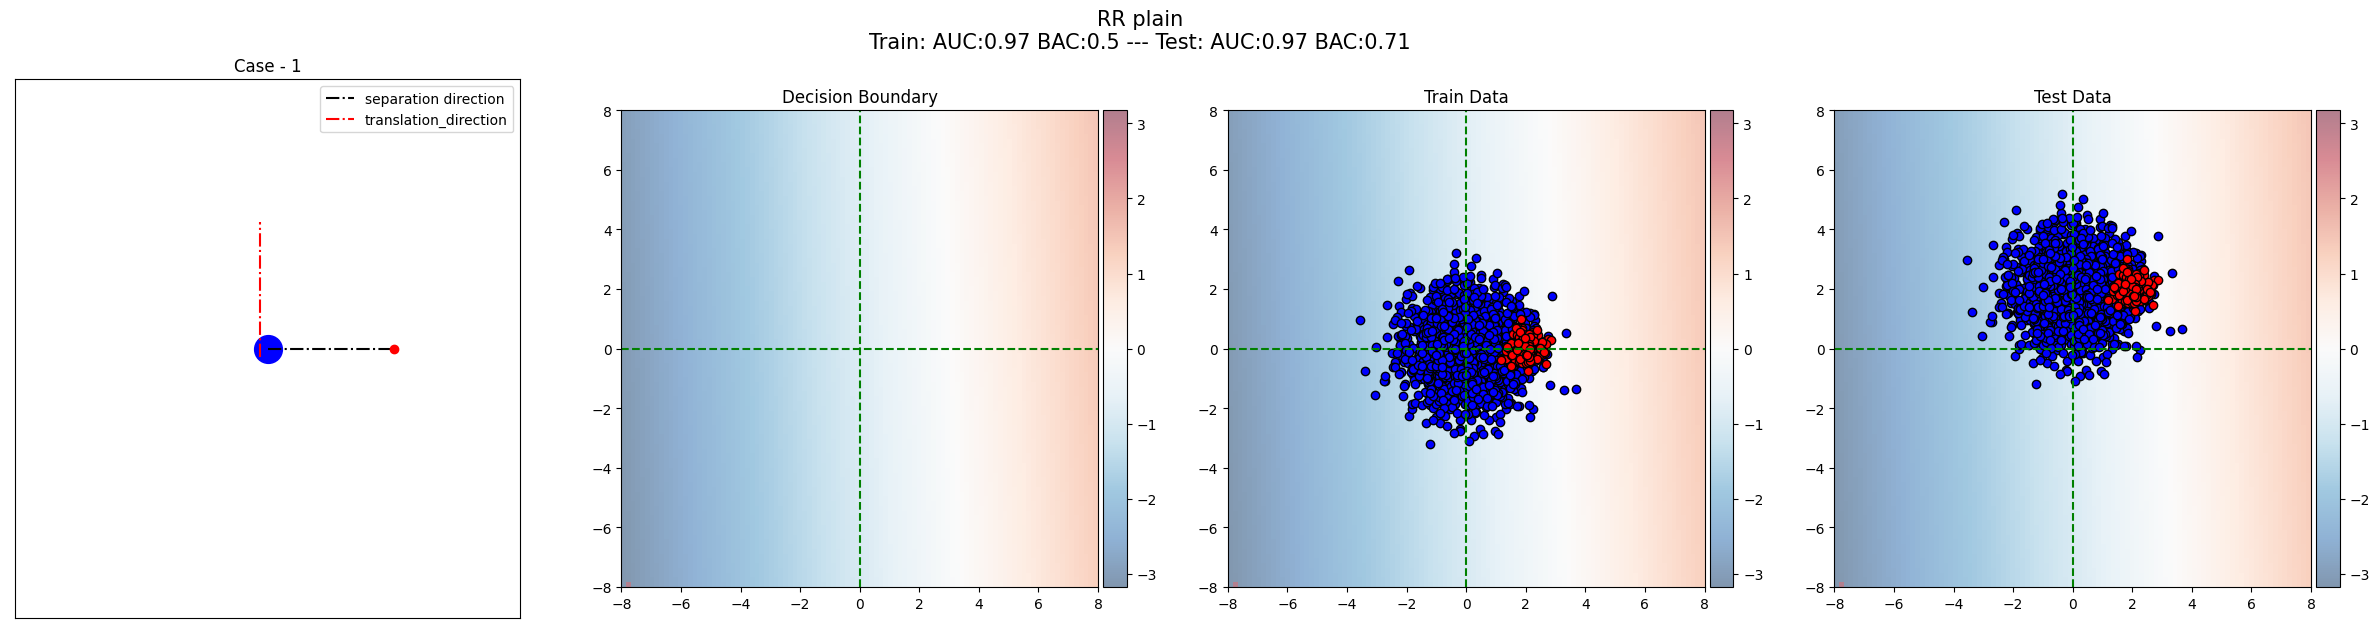

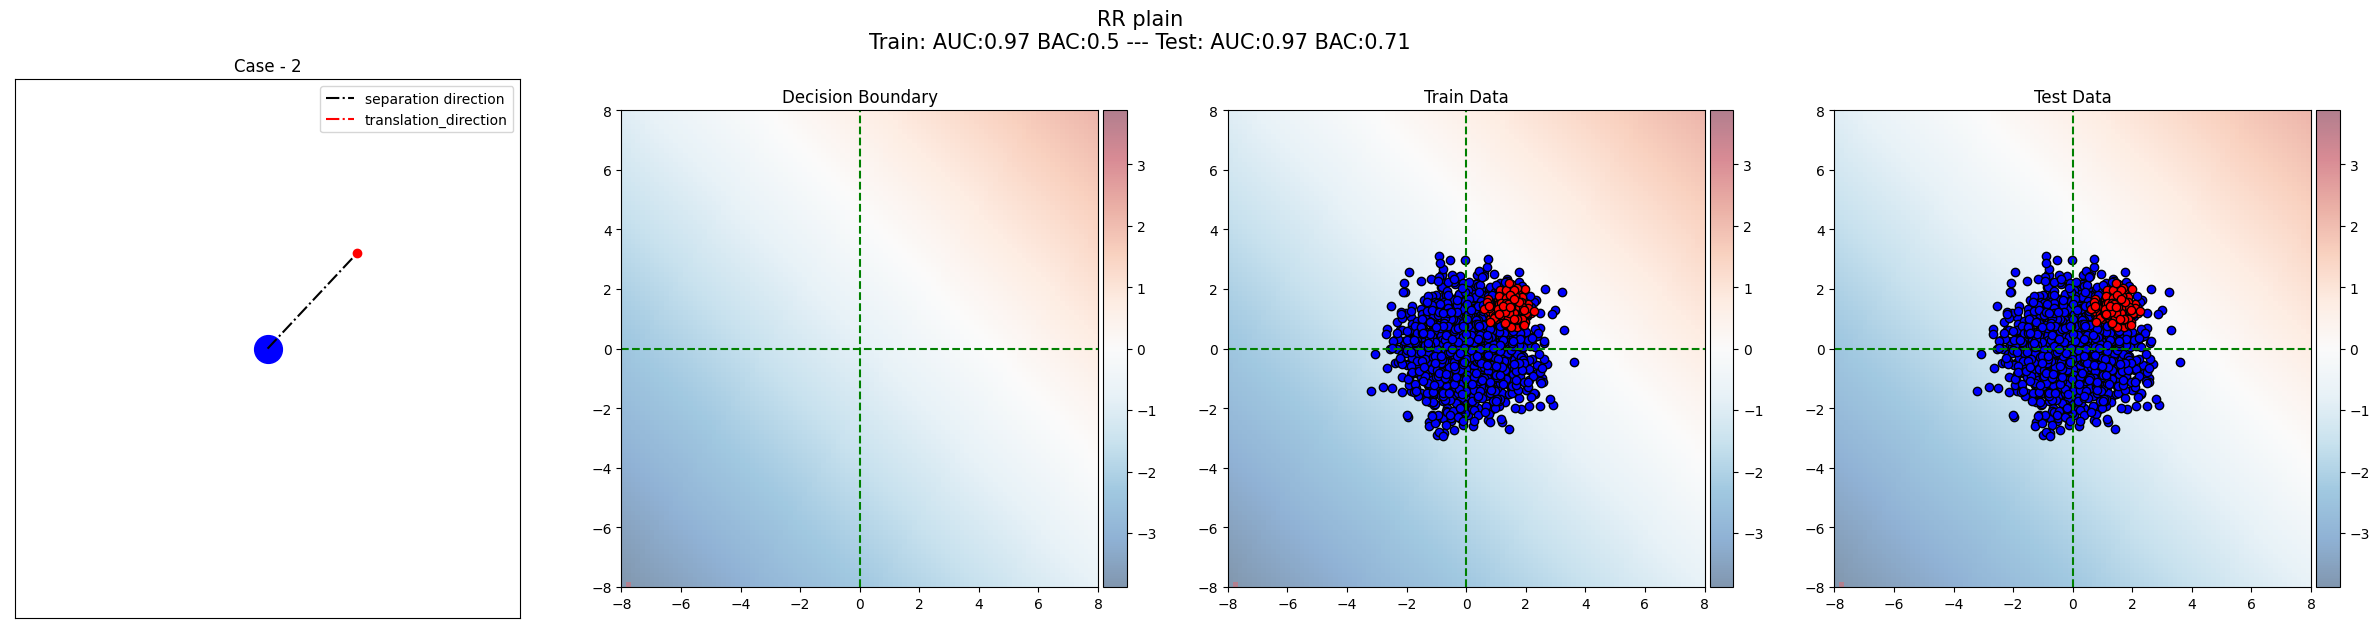

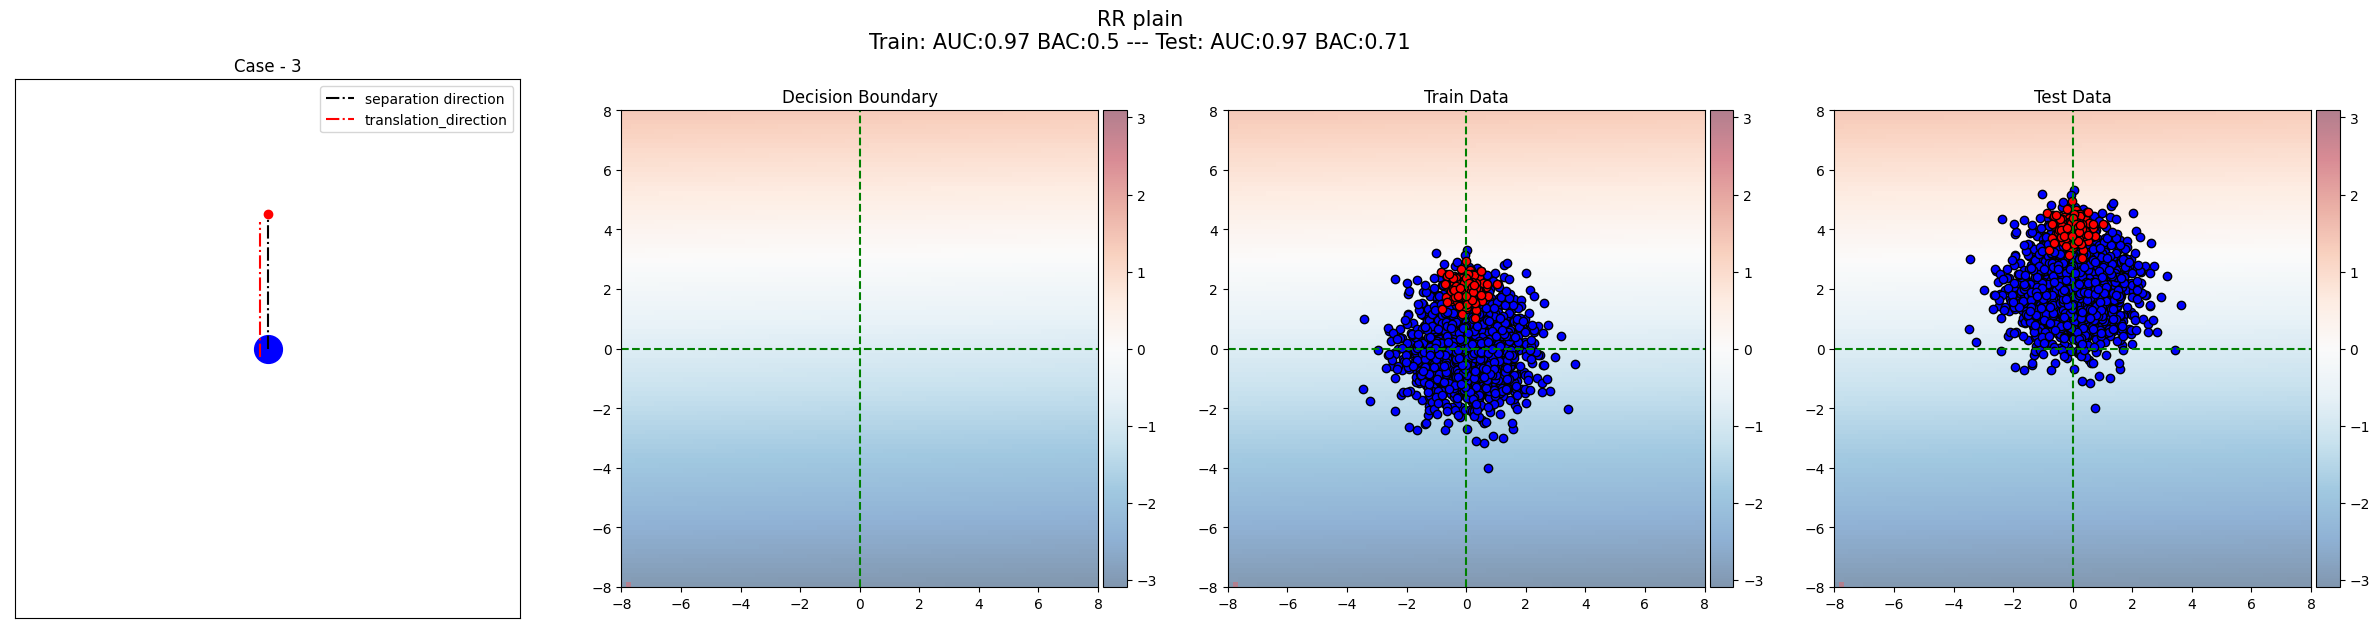

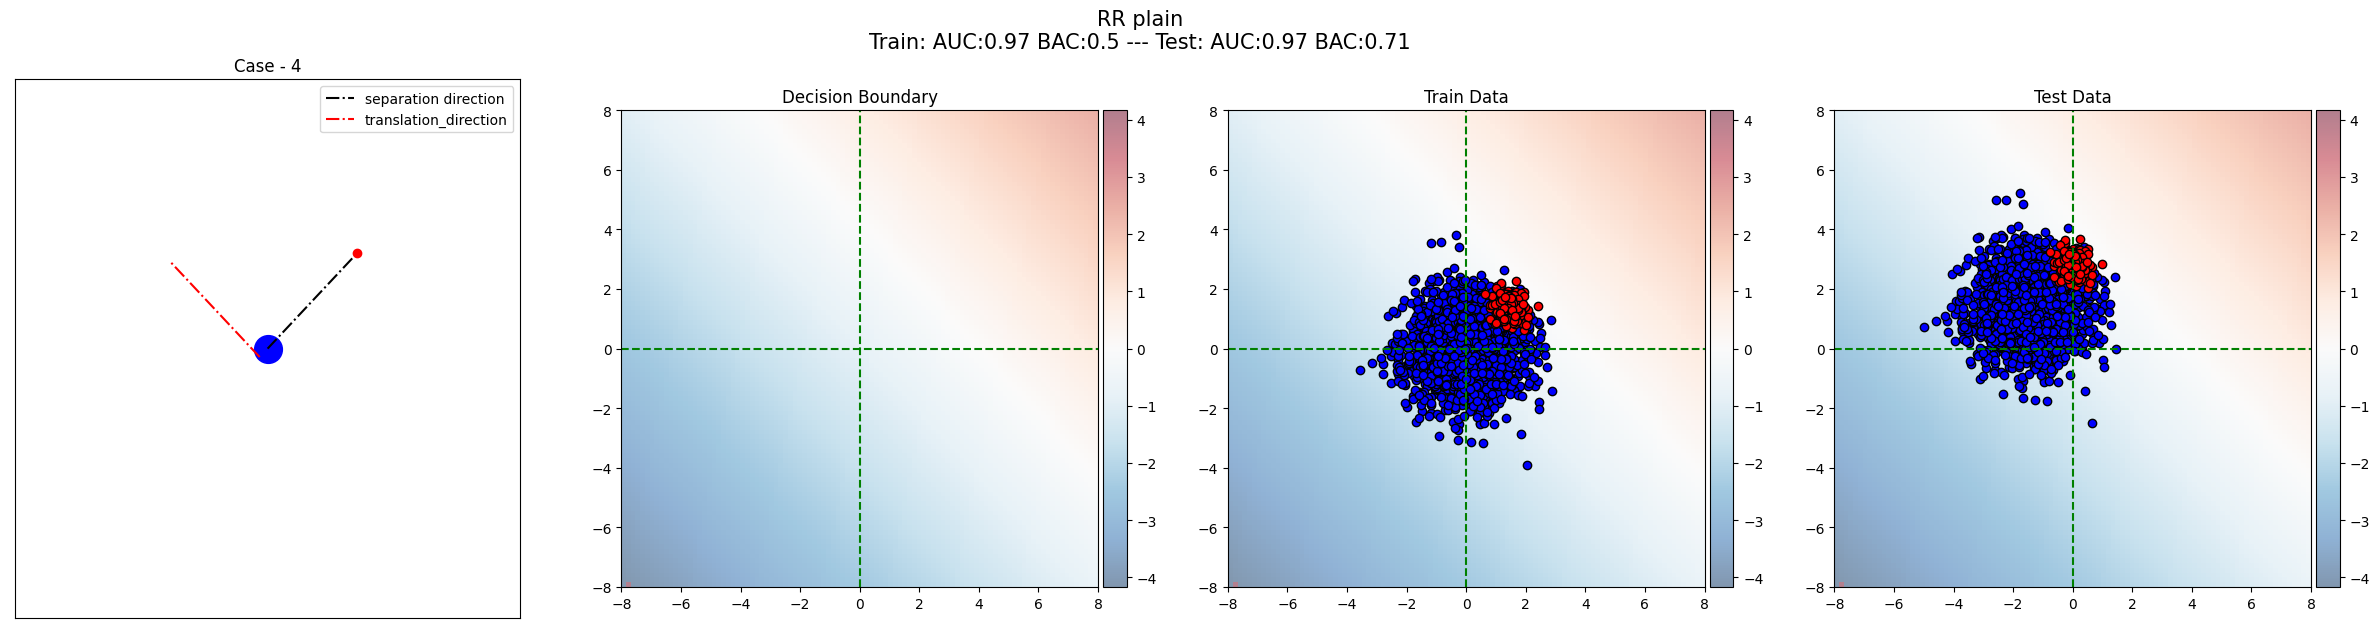

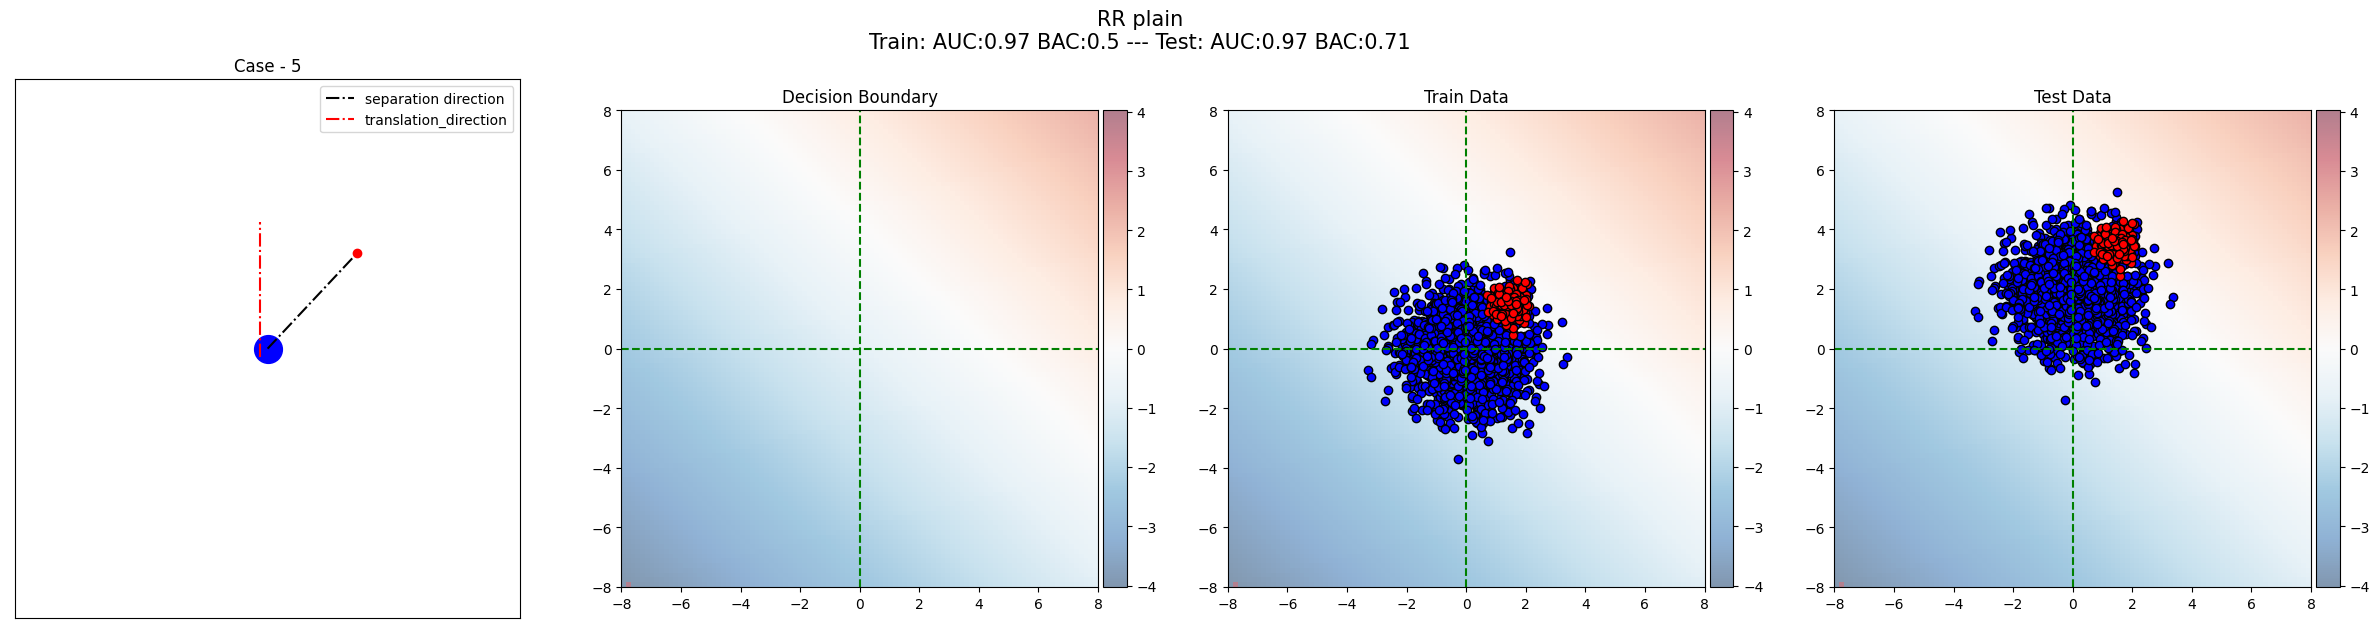

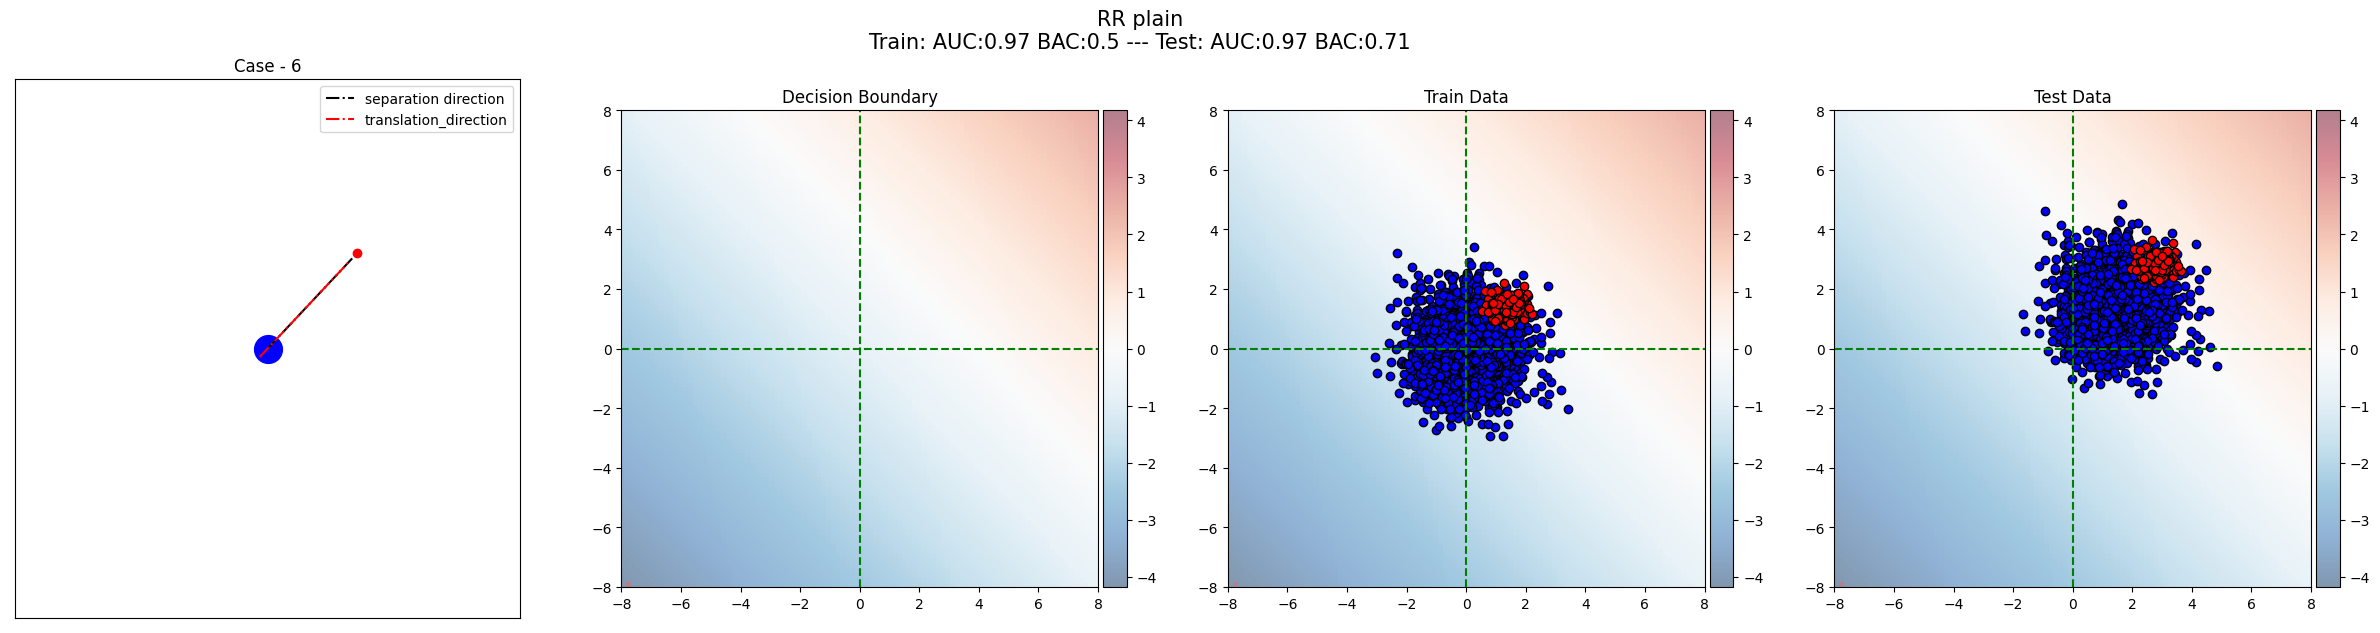

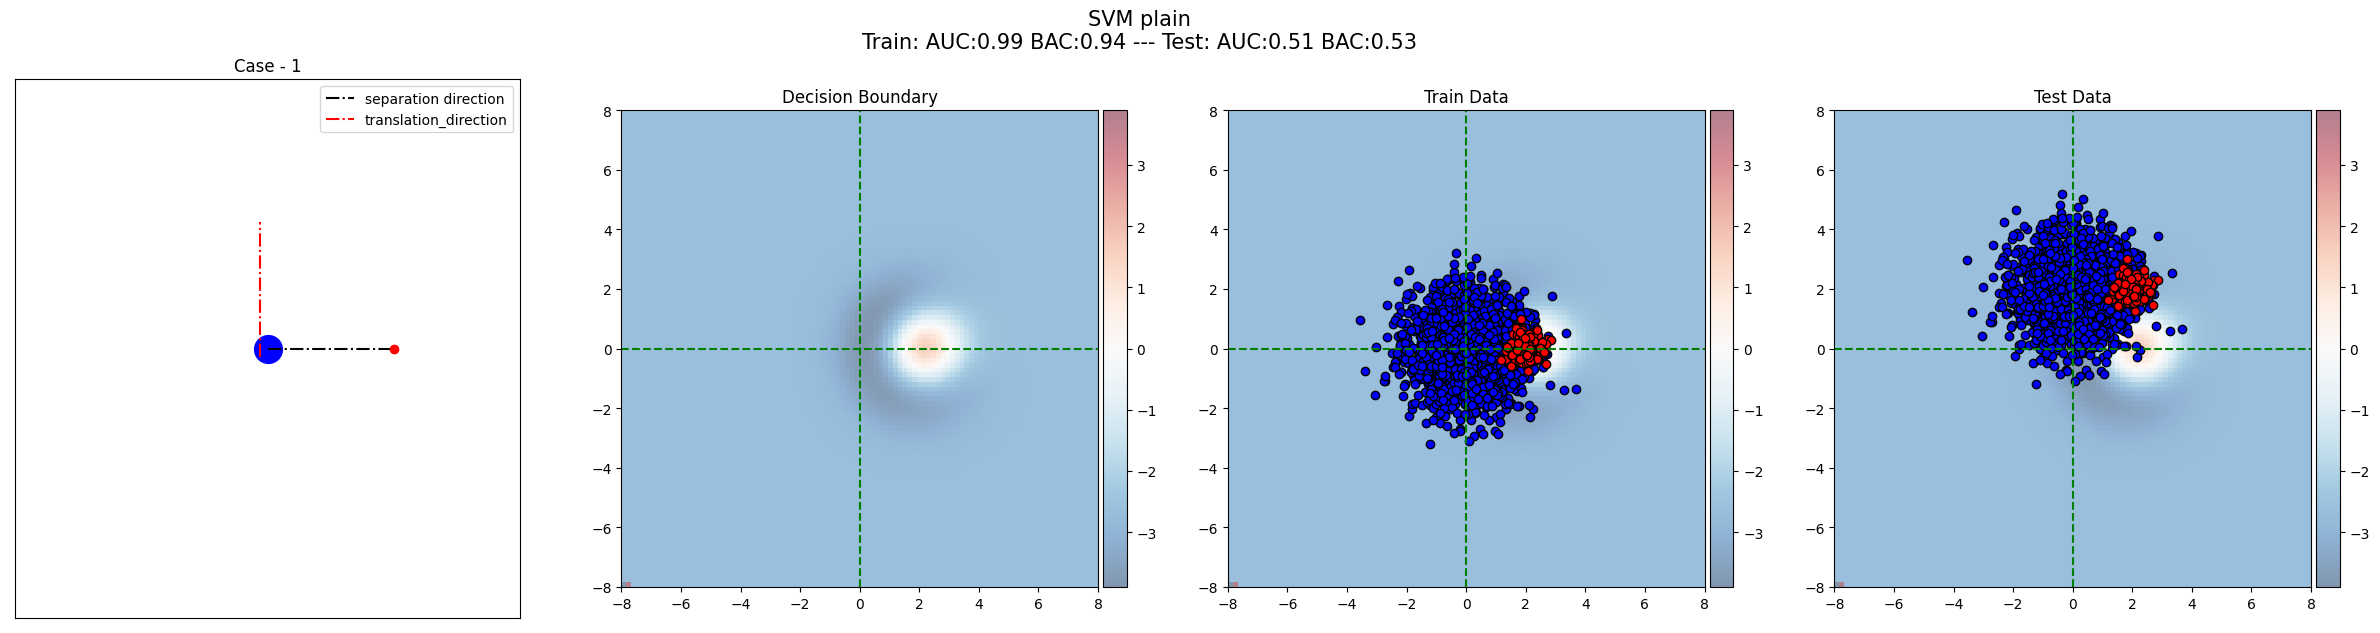

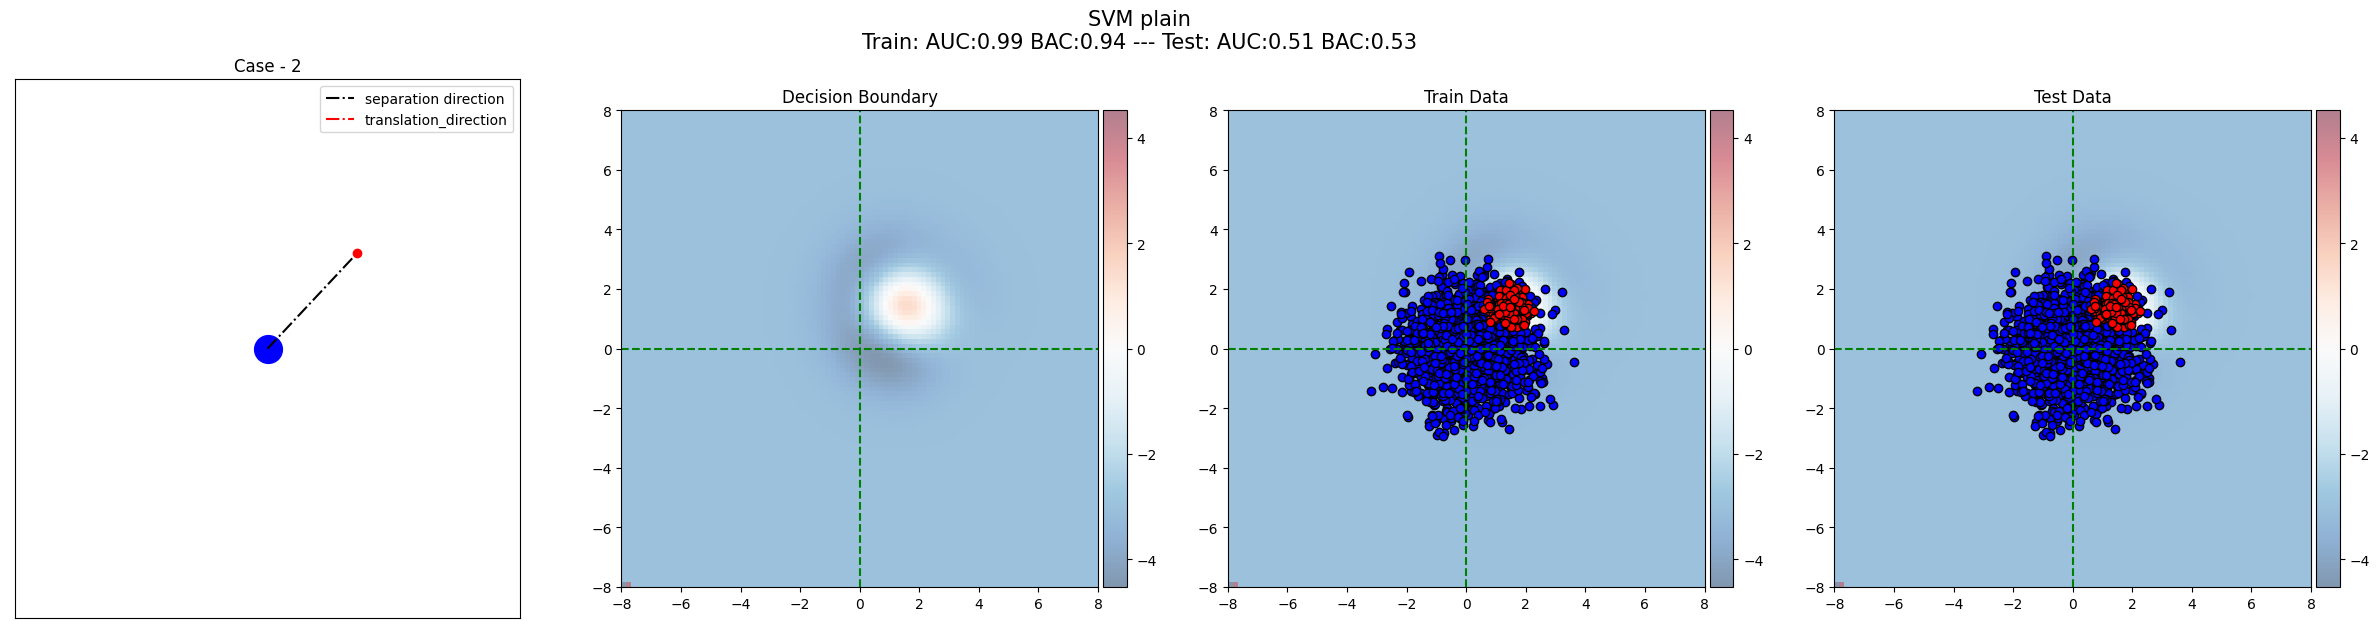

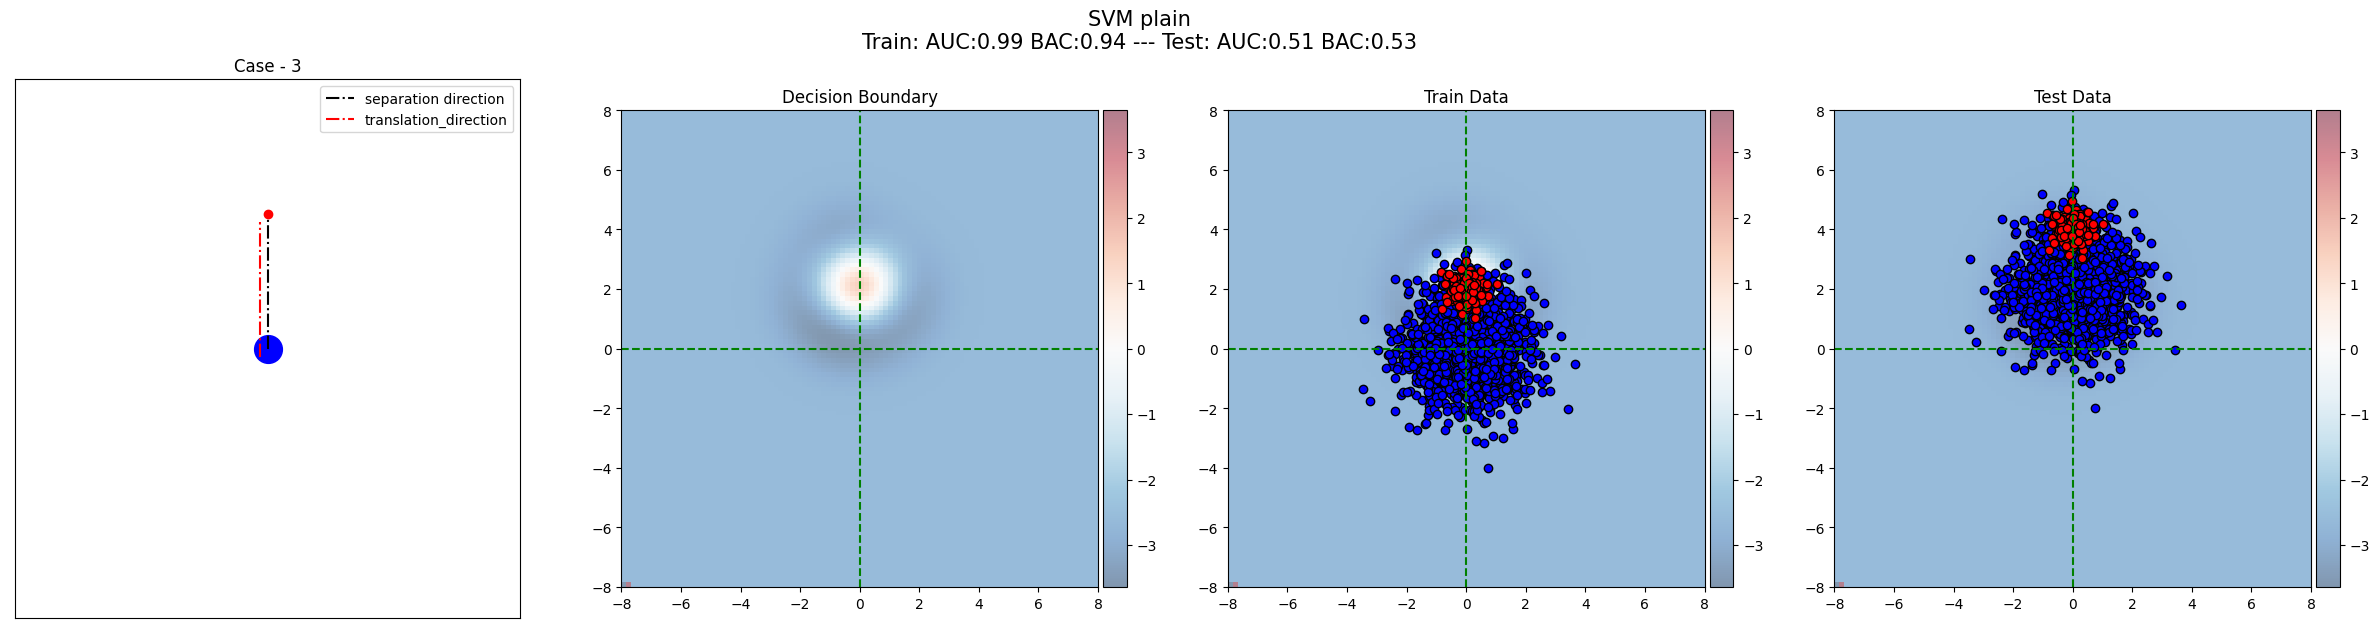

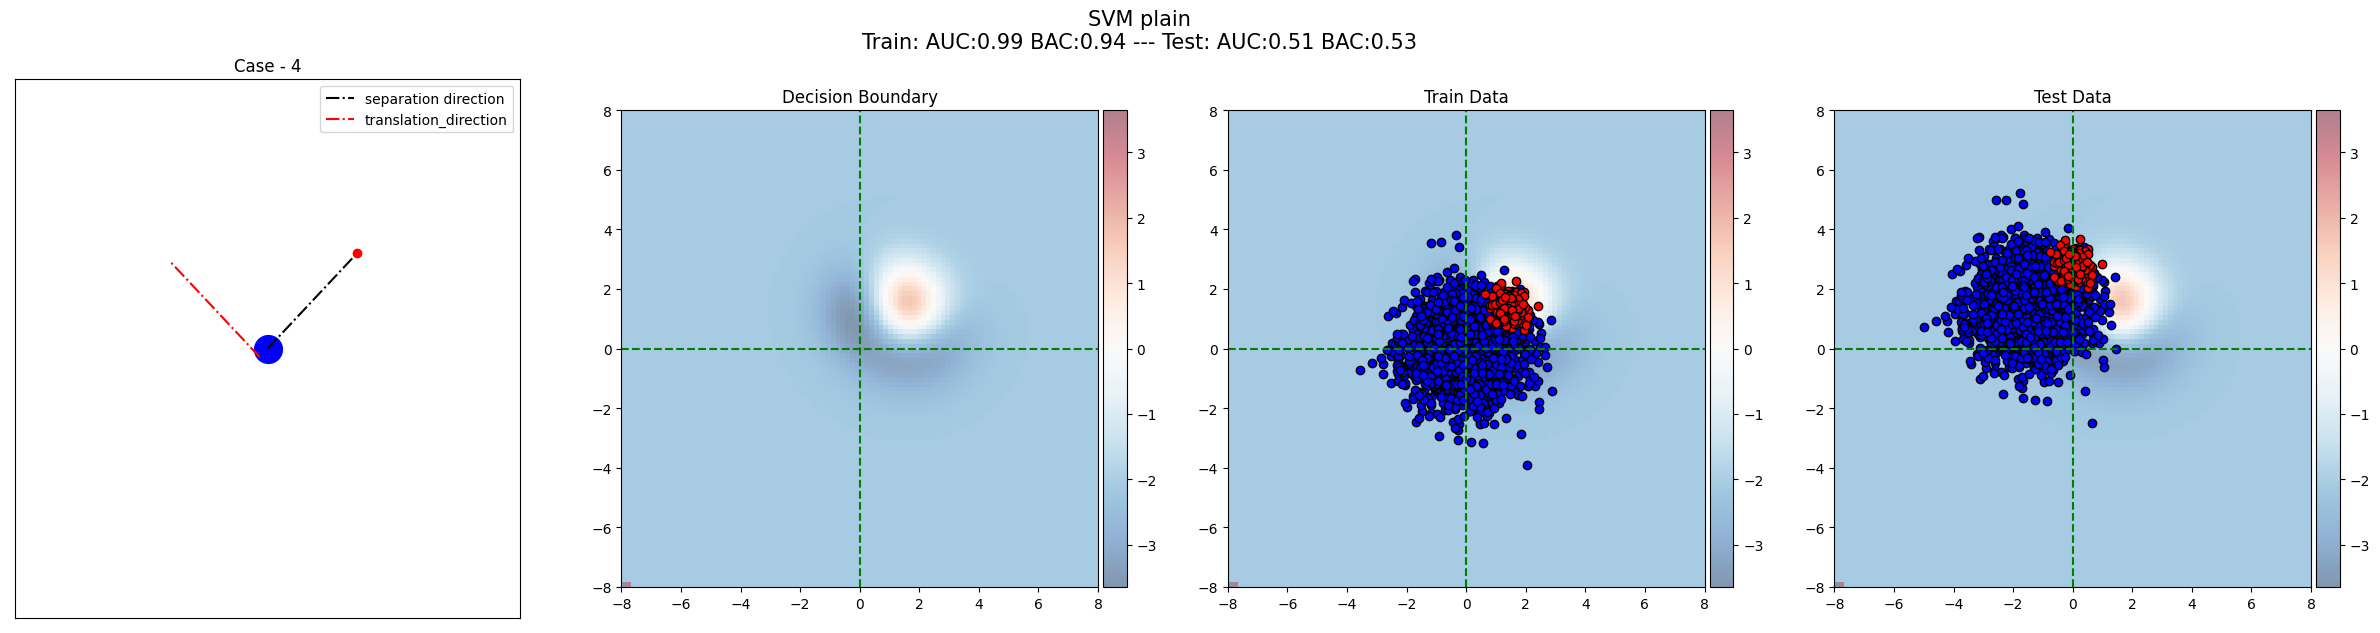

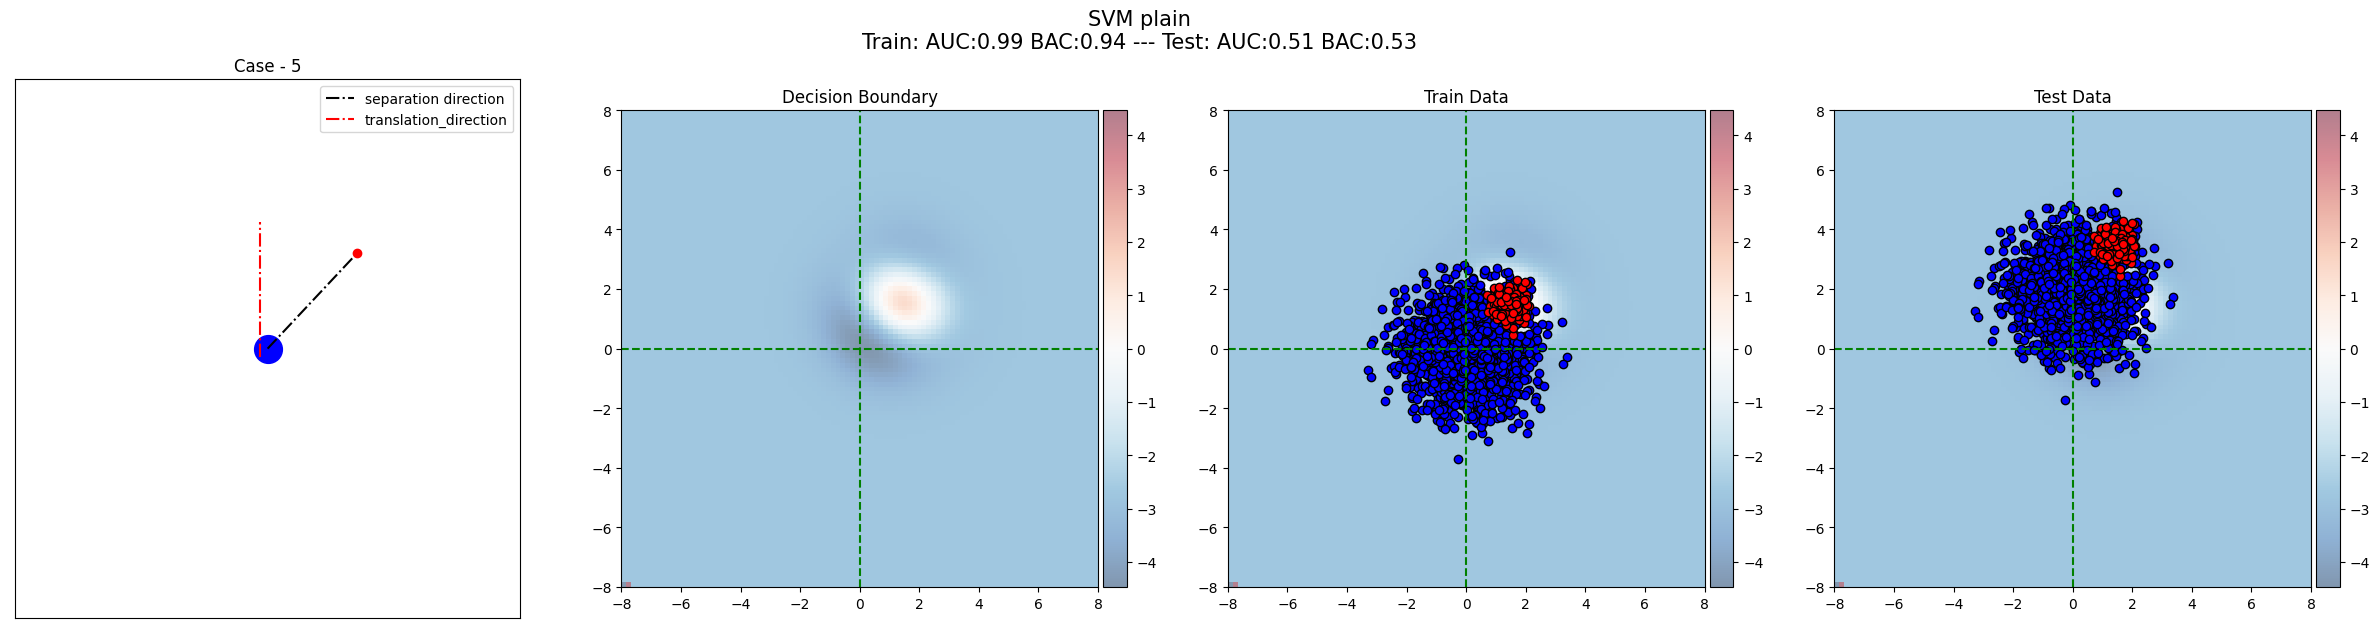

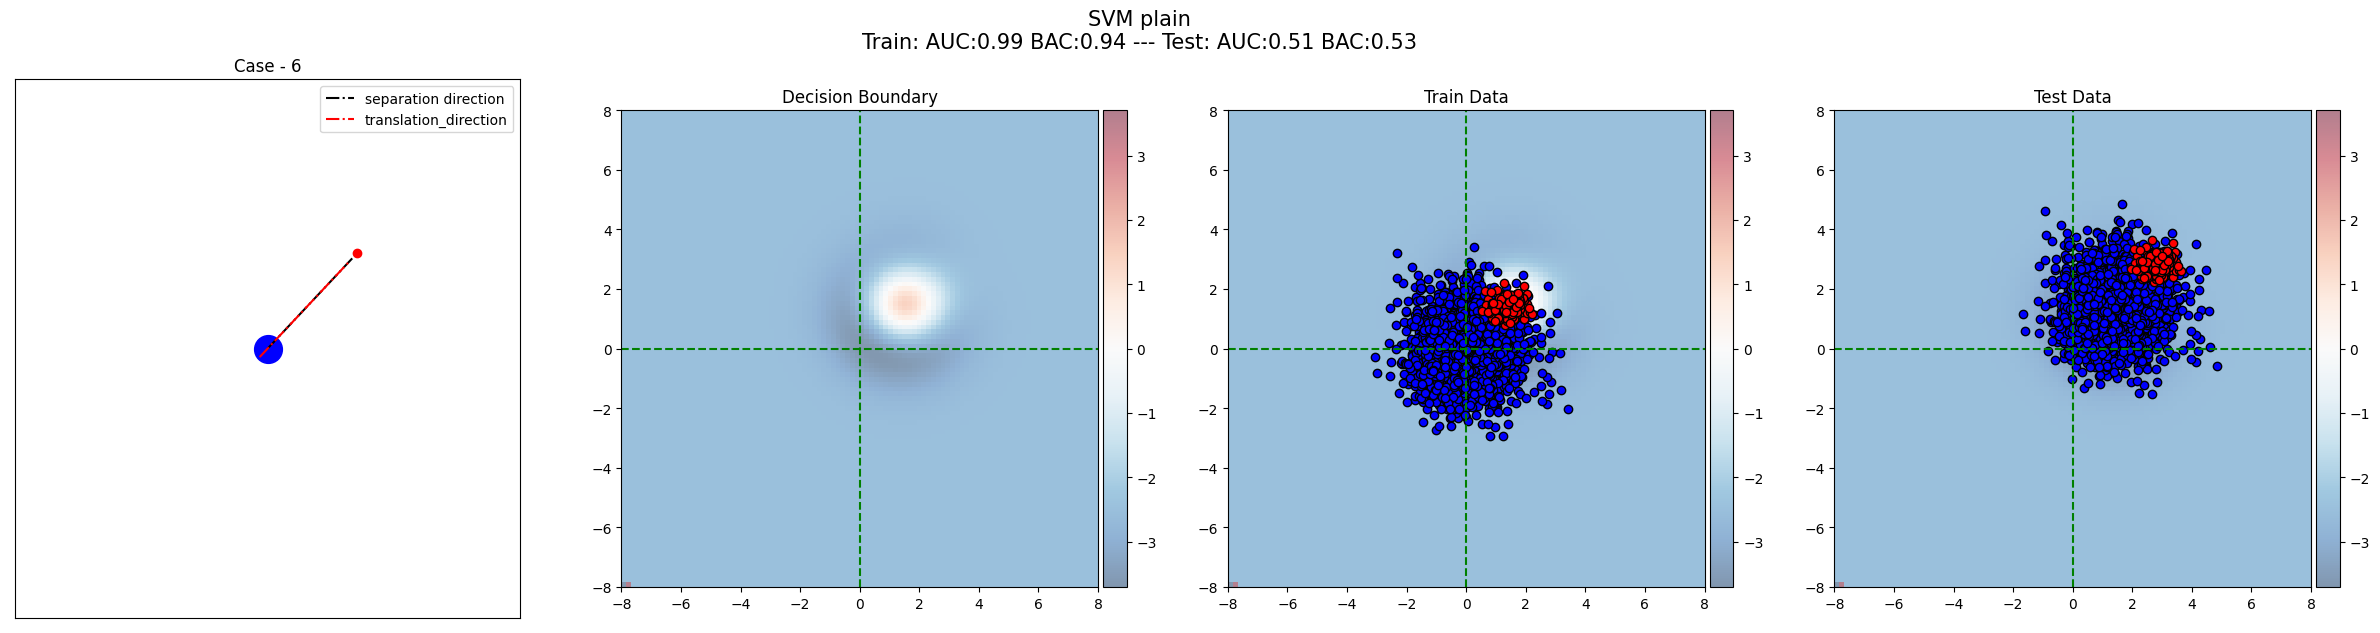

In [ ]:
for model_s, result in zip(model_settings, results):
    if model_s["model_name"] != "Constant":
        if model_s["preprocessing"]:
            visualize_decicion_boundary(model_s["display_name"], settings, result, train_sets, test_sets_preprocessed)
        elif model_s["data_augmentation"]:
            visualize_decicion_boundary(model_s["display_name"], settings, result, augmented_sets, test_sets)
        else:
            visualize_decicion_boundary(model_s["display_name"], settings, result, train_sets, test_sets)

***
# 6 - Scoring
***

In this section, we evaluate the two baselines using AUC score. AUC stands for "Area Under the Curve". And the curve under which we measure the area is the ROC curve (Receiver Operating Characteristic curve). For two-classes classification, this curve is the plot of the true positive rate (TPR) as a function of the false positive rate (FPR) for all the values of a decision threshold.

**True Positive Rate**  (**TPR**) is a synonym for recall and is therefore defined as follows:
$$
TPR = \frac{TP}{TP+FN}
$$
**False Positive Rate**  (**FPR**) is defined as follows:
$$
FPR = \frac{FP}{FP+TN}
$$

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/ROCCurve.svg" width="400"/>
<br>
ROC Curve showing TPR vs. FPR at different classification thresholds
</div>

For example, if we assume that a model's output is kind of a probability (a real number between $0$ and $1$) that the input is in signal class, then you can set a threshold $t$, and decide to classify an input as signal iff the ouput probility is greater than $t$. For each value of $t$, this defines both a TPR($t$) and a FPR($t$). Then the points of the ROC curve have coordinates (FPR($t$),TPR($t$)) for all $t$ between $0$ and $1$.

<div style="text-align: center">
<img src="https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg" width="400"/>
<br>
AUC (Area under the ROC Curve)
</div>

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

Source : https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=fr

In [ ]:
train_columns = ["train_set 1", "train_set 2", "train_set 3", "train_set 4", "train_set 5", "train_set 6", "avg", "std_err"]
test_columns = ["test_set 1", "test_set 2", "test_set 3", "test_set 4", "test_set 5", "test_set 6",  "avg", "std_err"]


train_aucs, test_aucs, train_bacs, test_bacs, indexes = [],[],[],[],[]
for model_s, result in zip(model_settings, results):
    indexes.append(model_s["display_name"])

    

    train_aucs.append(copy(result["auc_trains"]))
    train_aucs[-1].extend([result["train_auc_mean"], result["train_auc_err"]])
    test_aucs.append(copy(result["auc_tests"]))
    test_aucs[-1].extend([result["test_auc_mean"], result["test_auc_err"]])
    train_bacs.append(copy(result["bac_trains"]))
    train_bacs[-1].extend([result["train_bac_mean"], result["train_bac_err"]])
    test_bacs.append(copy(result["bac_tests"]))
    test_bacs[-1].extend([result["test_bac_mean"], result["test_bac_err"]])



score_auc_df_train = pd.DataFrame(data=train_aucs, columns=train_columns, index=indexes)
score_auc_df_test = pd.DataFrame(data=test_aucs, columns=test_columns, index=indexes)
score_bac_df_train = pd.DataFrame(data=train_bacs, columns=train_columns, index=indexes)
score_bac_df_test = pd.DataFrame(data=test_bacs, columns=test_columns, index=indexes)


score_auc_df_train.to_csv("scoring_output/auc_train.csv")
score_auc_df_test.to_csv("scoring_output/auc_test.csv")
score_bac_df_train.to_csv("scoring_output/bac_train.csv")
score_bac_df_test.to_csv("scoring_output/bac_test.csv")


In [ ]:
score_auc_df_train

train_set 1  train_set 2  train_set 3  train_set 4  \
constant model           0.50         0.50         0.50         0.50   
NB plain                 0.99         0.99         0.99         0.99   
NB preprocessing         0.99         0.99         0.99         0.99   
LDA plain                0.97         0.97         0.97         0.98   
RR plain                 0.97         0.97         0.97         0.98   
SVM plain                0.99         0.99         0.99         0.99   

                  train_set 5  train_set 6   avg  std_err  
constant model           0.50         0.50  0.50      0.0  
NB plain                 0.99         0.99  0.99      0.0  
NB preprocessing         0.99         0.99  0.99      0.0  
LDA plain                0.97         0.97  0.97      0.0  
RR plain                 0.97         0.97  0.97      0.0  
SVM plain                0.99         0.99  0.99      0.0

In [ ]:
score_auc_df_test

test_set 1  test_set 2  test_set 3  test_set 4  test_set 5  \
constant model          0.50        0.50        0.50        0.50        0.50   
NB plain                0.84        0.99        0.19        0.89        0.50   
NB preprocessing        0.99        0.99        0.99        0.99        0.99   
LDA plain               0.97        0.97        0.97        0.98        0.97   
RR plain                0.97        0.97        0.97        0.98        0.97   
SVM plain               0.42        0.99        0.25        0.70        0.34   

                  test_set 6   avg  std_err  
constant model          0.50  0.50     0.00  
NB plain                0.18  0.60     0.13  
NB preprocessing        0.99  0.99     0.00  
LDA plain               0.97  0.97     0.00  
RR plain                0.97  0.97     0.00  
SVM plain               0.34  0.51     0.11

In [ ]:
score_bac_df_train

train_set 1  train_set 2  train_set 3  train_set 4  \
constant model                0.50         0.50         0.50         0.50   
NB plain                      0.93         0.92         0.92         0.94   
NB preprocessing              0.93         0.92         0.92         0.94   
LDA plain                     0.76         0.74         0.76         0.75   
RR plain                      0.50         0.50         0.50         0.50   
SVM plain                     0.93         0.93         0.93         0.95   
NB data augmentation          0.86         0.92         0.50         0.50   
LDA data augmentation         0.66         0.65         0.50         0.67   
RR data augmentation          0.50         0.50         0.50         0.50   
SVM data augmentation         0.82         0.91         0.50         0.82   

                       train_set 5  train_set 6   avg  std_err  
constant model                0.50         0.50  0.50     0.00  
NB plain                      0.91         0.93  0.92     0.00  
NB preprocessing              0.91         0.93  0.92     0.00  
LDA plain                     0.71         0.74  0.74     0.01  
RR plain                      0.50         0.50  0.50     0.00  
SVM plain                     0.92         0.93  0.93     0.00  
NB data augmentation          0.63         0.50  0.65     0.07  
LDA data augmentation         0.50         0.50  0.58     0.03  
RR data augmentation          0.50         0.50  0.50     0.00  
SVM data augmentation         0.50         0.50  0.68     0.07

In [ ]:
score_bac_df_test

test_set 1  test_set 2  test_set 3  test_set 4  \
constant model               0.50        0.50        0.50        0.50   
NB plain                     0.50        0.92        0.38        0.50   
NB preprocessing             0.93        0.92        0.92        0.94   
LDA plain                    0.82        0.74        0.73        0.76   
RR plain                     0.50        0.50        0.91        0.50   
SVM plain                    0.50        0.93        0.36        0.50   
NB data augmentation         0.87        0.92        0.50        0.50   
LDA data augmentation        0.66        0.65        0.50        0.66   
RR data augmentation         0.50        0.50        0.50        0.50   
SVM data augmentation        0.79        0.91        0.50        0.87   

                       test_set 5  test_set 6   avg  std_err  
constant model               0.50        0.50  0.50     0.00  
NB plain                     0.47        0.39  0.53     0.07  
NB preprocessing             0.91        0.93  0.92     0.00  
LDA plain                    0.88        0.74  0.78     0.02  
RR plain                     0.87        0.92  0.70     0.08  
SVM plain                    0.46        0.38  0.52     0.08  
NB data augmentation         0.75        0.50  0.67     0.07  
LDA data augmentation        0.51        0.50  0.58     0.03  
RR data augmentation         0.50        0.50  0.50     0.00  
SVM data augmentation        0.50        0.50  0.68     0.07

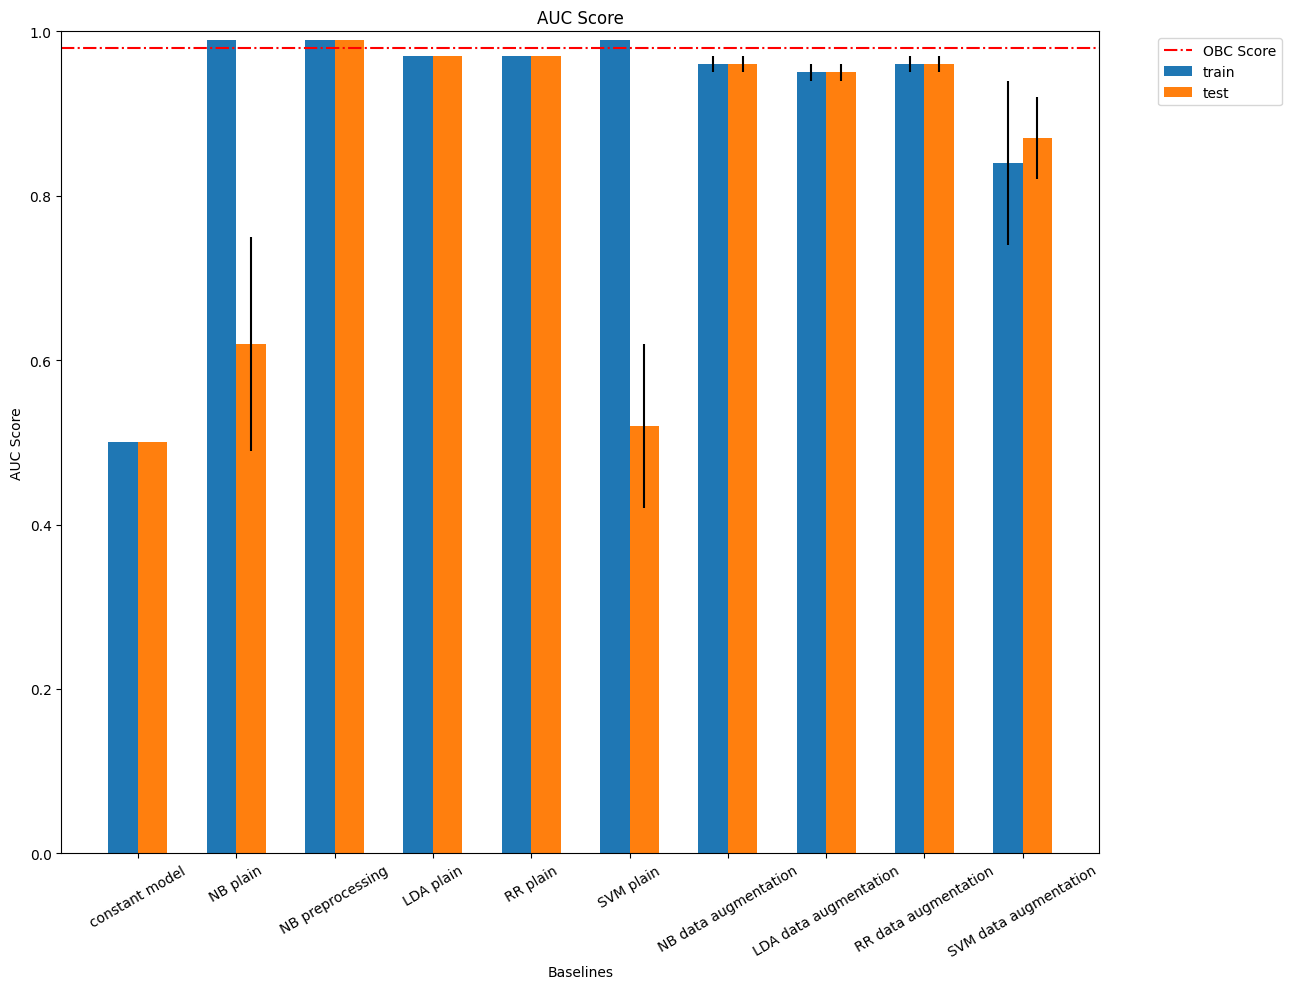

In [ ]:
visualize_score(score_auc_df_train, score_auc_df_test, obc_auc, "AUC Score",N = 12)

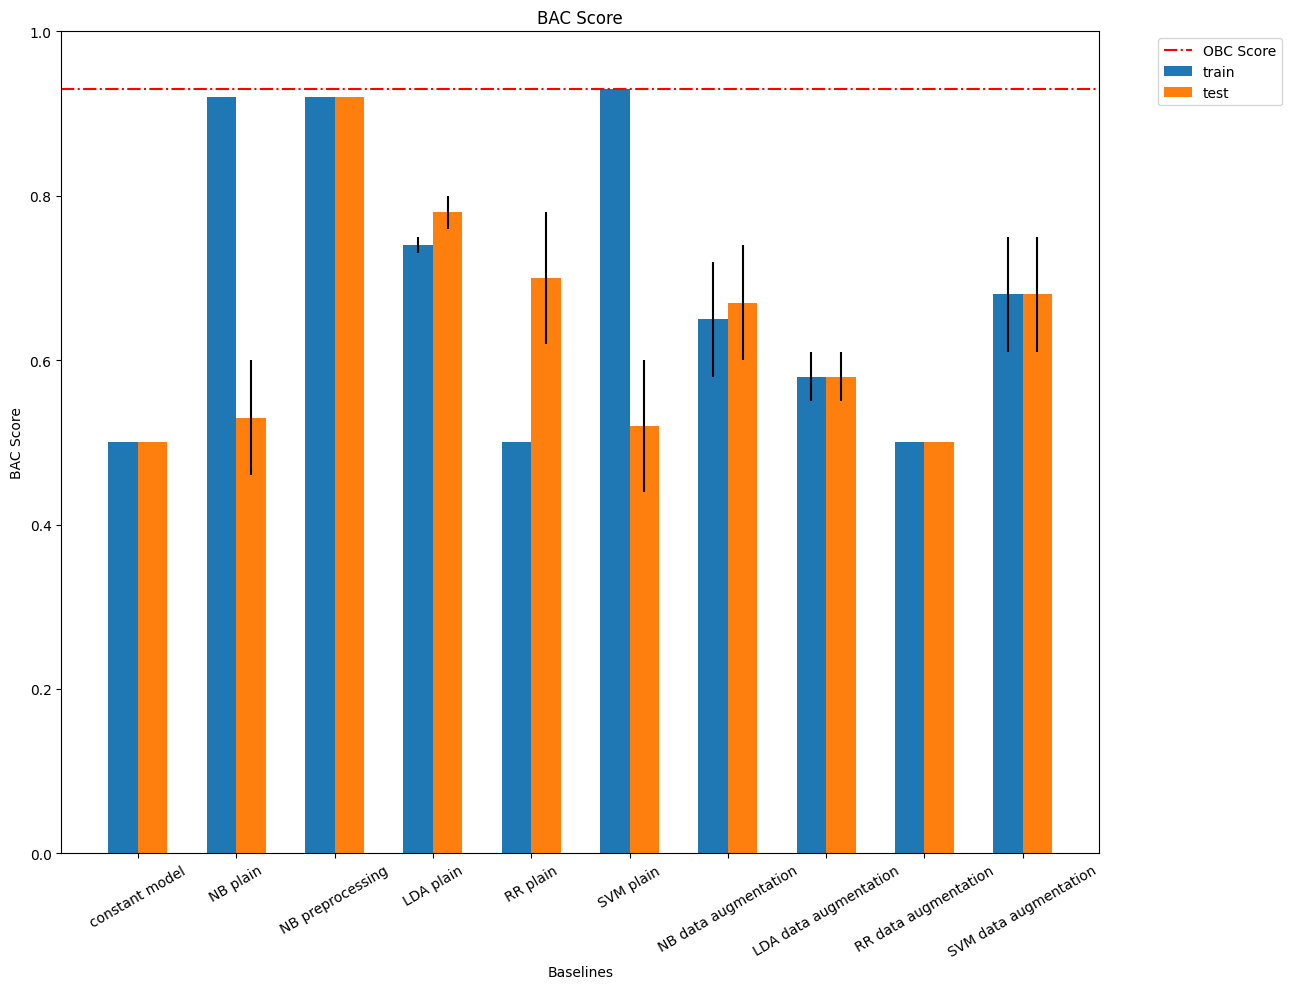

In [ ]:
visualize_score(score_bac_df_train, score_bac_df_test, obc_bac, "BAC Score")

***
# 7 - Submissions
***

### Unit Testing 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

**Test Ingestion Program**

In [ ]:
!python3 $problem_dir/ingestion.py

############################################
### Ingestion Program
############################################


###-------------------------------------###
### Data Loading
###-------------------------------------###

[*] data dir :  ./sample_data
[*] train data dir :  ./sample_data\train\data
[*] train labels dir :  ./sample_data\train\labels
[*] test data dir :  ./sample_data\test\data
[*] test labels dir :  ./sample_data\test\labels
[+] train data dir found
[+] train labels dir found
[+] test data dir found
[+] test labels dir found
[+] 6 train and test sets found
---------------------------------
[+] Train and Test data loaded!
---------------------------------



[*] Dataset : 1
-----------
[*] Loading Model
[*] Training Model
[*] Making Predictions
[*] Saving Predictions
[*] Saving Scores

[*] Dataset : 2
-----------
[*] Loading Model
[*] Training Model
[*] Making Predictions
[*] Saving Predictions
[*] Saving Scores

[*] Dataset : 3
-----------
[*] Loading Model
[*] Training Mo

**Test Scoring Program**

In [ ]:
!python3 $score_dir/score.py

############################################
### Scoring Program
############################################
[*] Reading predictions and solutions
[*] Predictions files : ['test_1.predictions', 'test_2.predictions', 'test_3.predictions', 'test_4.predictions', 'test_5.predictions', 'test_6.predictions']
[*] Score files : ['test_1.scores', 'test_2.scores', 'test_3.scores', 'test_4.scores', 'test_5.scores', 'test_6.scores']
[*] Solutions files : ['test_1.labels', 'test_2.labels', 'test_3.labels', 'test_4.labels', 'test_5.labels', 'test_6.labels']
[+] 6 prediction, score, solution files found
---------------------------------
[+] Predictions and Solution files loaded!
---------------------------------


[*] Computing AUC and BAC scores

Test set 1
-----------
AUC: 0.87
BAC: 0.5

Test set 2
-----------
AUC: 0.99
BAC: 0.92

Test set 3
-----------
AUC: 0.28
BAC: 0.38

Test set 4
-----------
AUC: 0.88
BAC: 0.5

Test set 5
-----------
AUC: 0.53
BAC: 0.47

Test set 6
-----------
AUC: 0.19
BAC: 

### Prepare the submission

In [ ]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'code_submission_' + the_date + '.zip'
# sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(code_submission, model_dir)
# zipdir(sample_result_submission, result_dir)
print("Submit : " + code_submission + " to the compeition: https://www.codabench.org/competitions/674/")

Submit : code_submission_23-03-23-14-08.zip to the compeition: https://www.codabench.org/competitions/674/


Sample Code Submission is generated in the directory: `fair-universe/starting_kit/`